<a href="https://colab.research.google.com/github/Subham2S/ML-Kaggle-Weather-Dataset/blob/main/Group1_WeatherDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Assignment**

## Group No 1

## Group Member Names:
1. SUBHAM SHIT
2. AJAY PATHAK
3. ASNANI KAMLESH KUNDANLAL TARUNA

# **1. Import Libraries/Dataset**

In [38]:
import time
start_time = time.time()

In [39]:
!pip install opendatasets
!pip install pandas_profiling

## **1.1 Importing Libraries/Packages**

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import seaborn as sns
import warnings
# Packages related to general operating system & warnings
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from xgboost import XGBClassifier, XGBRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
import statsmodels.formula.api as smf
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE, RFECV, SelectKBest, chi2, SelectPercentile, f_classif, mutual_info_classif, f_regression, VarianceThreshold, SelectFromModel, mutual_info_classif, mutual_info_regression, SelectFpr, SelectFdr, SelectFwe
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.impute import MissingIndicator, SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pandas_profiling
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import opendatasets as od
import warnings
from scipy.stats import shapiro, anderson, kurtosis
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler

warnings.filterwarnings('ignore')

# Packages related to data importing, manipulation, exploratory data analysis, data understanding

# Packages related to data visualizaiton
%matplotlib inline

# Setting plot sizes and type of plot
plt.rc("font", size=14)
plt.rcParams['axes.grid'] = True
plt.figure(figsize=(6, 3))
plt.gray()

%matplotlib inline
sns.set(style='ticks', font_scale=1.2)
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

from itertools import combinations as cm
from sklearn.impute import KNNImputer

<Figure size 600x300 with 0 Axes>

## **1.2 Downloading Dataset**

In [41]:
# The kaggle username and API - used for downloading the data

dataset_url = "https://www.kaggle.com/muthuj7/weather-dataset"
od.download(dataset_url, force=True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kamleshkagg
Your Kaggle Key: ··········


100%|██████████| 2.23M/2.23M [00:00<00:00, 115MB/s]

### Converting the above downloaded data into a dataframe

In [42]:
df_weather = pd.read_csv("/content/weather-dataset/weatherHistory.csv")

### Displaying the first 5 and last 5 records.

In [43]:
# First Five Records
df_weather.head(5)

Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13   
1                   259.0          15.8263         0.0               1015.63   
2                   204.0          14.9569         0.0               1015.94   
3                   269.0          15.8263         0.0               1016.41   
4                   259.0          15.8263         0.0               1016.51   

                       Daily Summary  
0  Partly cloudy throughout the day.  
1  Partly cloudy throughout the day.  
2  Partly cloudy throughout the day.  
3  Partly cloudy throughout the day.  
4  Partly cloudy throughout the day.

In [44]:
# Last Five Records
df_weather.tail()

Formatted Date        Summary Precip Type  \
96448  2016-09-09 19:00:00.000 +0200  Partly Cloudy        rain   
96449  2016-09-09 20:00:00.000 +0200  Partly Cloudy        rain   
96450  2016-09-09 21:00:00.000 +0200  Partly Cloudy        rain   
96451  2016-09-09 22:00:00.000 +0200  Partly Cloudy        rain   
96452  2016-09-09 23:00:00.000 +0200  Partly Cloudy        rain   

       Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
96448        26.016667                 26.016667      0.43            10.9963   
96449        24.583333                 24.583333      0.48            10.0947   
96450        22.038889                 22.038889      0.56             8.9838   
96451        21.522222                 21.522222      0.60            10.5294   
96452        20.438889                 20.438889      0.61             5.8765   

       Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
96448                    31.0          16.1000         0.0   
96449                    20.0          15.5526         0.0   
96450                    30.0          16.1000         0.0   
96451                    20.0          16.1000         0.0   
96452                    39.0          15.5204         0.0   

       Pressure (millibars)                           Daily Summary  
96448               1014.36  Partly cloudy starting in the morning.  
96449               1015.16  Partly cloudy starting in the morning.  
96450               1015.66  Partly cloudy starting in the morning.  
96451               1015.95  Partly cloudy starting in the morning.  
96452               1016.16  Partly cloudy starting in the morning.

In [45]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [46]:
# Categorigal Variables
cat_cols = df_weather.select_dtypes(['object']).columns.to_list()
for i in cat_cols:
    df_weather[i] = pd.Categorical(df_weather[i])

# Continuous Variables
conti_cols = df_weather.select_dtypes(['int64', 'float64']).columns.to_list()

In [47]:
# Creating UDFs for personalised summary
def conti_var_summary(x):
    '''
    UDF for getting customised summary for continuous variables
    '''
    # freq and missings
    n_total = x.shape[0]
    n_miss = x.isna().sum()
    perc_miss = n_miss * 100 / n_total

    # outliers - iqr
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lc_iqr = q1 - 1.5 * iqr
    uc_iqr = q3 + 1.5 * iqr

    return pd.Series([
        x.dtype,
        x.nunique(), n_total,
        x.count(), n_miss, perc_miss,
        x.sum(),
        x.mean(),
        x.std(),
        x.var(), lc_iqr, uc_iqr,
        x.min(),
        x.quantile(0.01),
        x.quantile(0.05),
        x.quantile(0.10),
        x.quantile(0.25),
        x.quantile(0.5),
        x.quantile(0.75),
        x.quantile(0.90),
        x.quantile(0.95),
        x.quantile(0.99),
        x.max()
    ],
        index=[
        'dtype', 'cardinality', 'n_tot', 'n', 'nmiss',
        'perc_miss', 'sum', 'mean', 'std', 'var', 'lc_iqr',
        'uc_iqr', 'min', 'p1', 'p5', 'p10', 'p25', 'p50',
                         'p75', 'p90', 'p95', 'p99', 'max'
    ])


def cat_var_summary(x):
    '''
    UDF for getting customised summary for categorical variables
    '''
    Mode = x.value_counts().sort_values(ascending=False)[0:1].reset_index()
    return pd.Series([
        x.count(),
        x.nunique(),
        x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1],
        round(Mode.iloc[0, 1] * 100 / x.count(), 2)
    ],
        index=['N', 'CARDINALITY', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [48]:
# Column Headings
print('\nColumn Headings:\n', df_weather.columns)

# Description
print('\nDescription:')
print('Shape:\n', df_weather.shape)
print(df_weather.info())

# Statistical Information
print('\nStatistical Information:\n')
df_weather.describe()


Column Headings:
 Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

Description:
Shape:
 (96453, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Formatted Date            96453 non-null  category
 1   Summary                   96453 non-null  category
 2   Precip Type               95936 non-null  category
 3   Temperature (C)           96453 non-null  float64 
 4   Apparent Temperature (C)  96453 non-null  float64 
 5   Humidity                  96453 non-null  float64 
 6   Wind Speed (km/h)         96453 non-null  float64 
 7   Wind Bearing (degrees)    96453 non-null  float64 
 8 

Temperature (C)  Apparent Temperature (C)      Humidity  \
count     96453.000000              96453.000000  96453.000000   
mean         11.932678                 10.855029      0.734899   
std           9.551546                 10.696847      0.195473   
min         -21.822222                -27.716667      0.000000   
25%           4.688889                  2.311111      0.600000   
50%          12.000000                 12.000000      0.780000   
75%          18.838889                 18.838889      0.890000   
max          39.905556                 39.344444      1.000000   

       Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
count       96453.000000            96453.000000     96453.000000     96453.0   
mean           10.810640              187.509232        10.347325         0.0   
std             6.913571              107.383428         4.192123         0.0   
min             0.000000                0.000000         0.000000         0.0   
25%             5.828200              116.000000         8.339800         0.0   
50%             9.965900              180.000000        10.046400         0.0   
75%            14.135800              290.000000        14.812000         0.0   
max            63.852600              359.000000        16.100000         0.0   

       Pressure (millibars)  
count          96453.000000  
mean            1003.235956  
std              116.969906  
min                0.000000  
25%             1011.900000  
50%             1016.450000  
75%             1021.090000  
max             1046.380000

### Statistical Summary

#### Continuous Variables:

In [49]:
df_weather.select_dtypes(['int64','float64']).apply(conti_var_summary)

Temperature (C) Apparent Temperature (C)  Humidity  \
dtype               float64                  float64   float64   
cardinality            7574                     8984        90   
n_tot                 96453                    96453     96453   
n                     96453                    96453     96453   
nmiss                     0                        0         0   
perc_miss               0.0                      0.0       0.0   
sum          1150942.633333                1047000.1  70883.21   
mean              11.932678                10.855029  0.734899   
std                9.551546                10.696847  0.195473   
var               91.232037               114.422544   0.03821   
lc_iqr           -16.536111               -22.480556     0.165   
uc_iqr            40.063889                43.630556     1.325   
min              -21.822222               -27.716667       0.0   
p1                -7.744444               -11.505556      0.27   
p5                -2.766667                -6.041111      0.35   
p10               -0.126667                -3.311111      0.43   
p25                4.688889                 2.311111       0.6   
p50                    12.0                     12.0      0.78   
p75               18.838889                18.838889      0.89   
p90               24.905556                24.905556      0.95   
p95               27.777778                27.933333      0.97   
p99               32.755556                32.811111       1.0   
max               39.905556                39.344444       1.0   

            Wind Speed (km/h) Wind Bearing (degrees) Visibility (km)  \
dtype                 float64                float64         float64   
cardinality              2484                    360             949   
n_tot                   96453                  96453           96453   
n                       96453                  96453           96453   
nmiss                       0                      0               0   
perc_miss                 0.0                    0.0             0.0   
sum              1042718.6735             18085828.0     998030.5314   
mean                 10.81064             187.509232       10.347325   
std                  6.913571             107.383428        4.192123   
var                 47.797464           11531.200691       17.573897   
lc_iqr                -6.6332                 -145.0         -1.3685   
uc_iqr                26.5972                  551.0         24.5203   
min                       0.0                    0.0             0.0   
p1                        0.0                    0.0           0.161   
p5                     2.5277                   10.0           1.932   
p10                    3.2039                   24.0           4.025   
p25                    5.8282                  116.0          8.3398   
p50                    9.9659                  180.0         10.0464   
p75                   14.1358                  290.0          14.812   
p90                   20.4148                  329.0         15.8263   
p95                  24.43014                  341.0            16.1   
p99                   32.8601                  356.0            16.1   
max                   63.8526                  359.0            16.1   

            Loud Cover Pressure (millibars)  
dtype          float64              float64  
cardinality          1                 4979  
n_tot            96453                96453  
n                96453                96453  
nmiss                0                    0  
perc_miss          0.0                  0.0  
sum                0.0          96765117.65  
mean               0.0          1003.235956  
std                0.0           116.969906  
var                0.0         13681.958835  
lc_iqr             0.0              998.115  
uc_iqr             0.0             1034.875  
min                0.0                  0.0  
p1                 0.0                  0.0  
p5      

#### Categorical Variables:

In [50]:
df_weather.select_dtypes(['category']).apply(cat_var_summary)

Formatted Date        Summary Precip Type  \
N                                    96453          96453       95936   
CARDINALITY                          96429             27           2   
NMISS                                    0              0         517   
MODE         2010-08-02 14:00:00.000 +0200  Partly Cloudy        rain   
FREQ                                     2          31733       85224   
PERCENT                                0.0           32.9       88.83   

                                 Daily Summary  
N                                        96453  
CARDINALITY                                214  
NMISS                                        0  
MODE         Mostly cloudy throughout the day.  
FREQ                                     20085  
PERCENT                                  20.82

In [51]:
df_weather['Precip Type'].unique()

['rain', 'snow', NaN]
Categories (2, object): ['rain', 'snow']

> Here **`Formatted Date`, `Daily Summary`** are having very high cardinality. Hence, these columns may consume high computational resources while building regression models. So, we have to drop these columns before moving further.

In [52]:
df_weather.drop(columns=['Formatted Date', 'Daily Summary'], inplace=True)

## **Observations**

In [53]:
# 1. Size of the dataset
df_weather.shape

(96453, 10)

In [54]:
# 2. Type of data attributes
df_weather.dtypes.unique()

array([CategoricalDtype(categories=['Breezy', 'Breezy and Dry', 'Breezy and Foggy',
                         'Breezy and Mostly Cloudy', 'Breezy and Overcast',
                         'Breezy and Partly Cloudy', 'Clear',
                         'Dangerously Windy and Partly Cloudy', 'Drizzle', 'Dry',
                         'Dry and Mostly Cloudy', 'Dry and Partly Cloudy', 'Foggy',
                         'Humid and Mostly Cloudy', 'Humid and Overcast',
                         'Humid and Partly Cloudy', 'Light Rain', 'Mostly Cloudy',
                         'Overcast', 'Partly Cloudy', 'Rain', 'Windy',
                         'Windy and Dry', 'Windy and Foggy',
                         'Windy and Mostly Cloudy', 'Windy and Overcast',
                         'Windy and Partly Cloudy'],
       , ordered=False)                                                            ,
       CategoricalDtype(categories=['rain', 'snow'], ordered=False),
       dtype('float64')], dtype=object)

In [55]:
# 3. Checking null data
df_weather.isnull().sum().sum()

517

>**Important Observation**<br>
The above data contains outliers on several columns. So, outliers must be treated and Nulls must be removed before preceeding further.

# 3. Data Preparation

## 3.1 Check for

* duplicate data
* missing data
* data inconsistencies


In [56]:
# Checking for Duplicated data :
print(f'Total No. of duplicates : {df_weather.duplicated().sum()} out of {df_weather.shape[0]} records.')

Total No. of duplicates : 72 out of 96453 records.


In [57]:
# Checking for Missing data :
df_weather.isnull().sum()

Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
dtype: int64

There are 517 missing data.

In [58]:
# Checking for Data Inconsistencies data :
df_weather.info()
df_weather.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Summary                   96453 non-null  category
 1   Precip Type               95936 non-null  category
 2   Temperature (C)           96453 non-null  float64 
 3   Apparent Temperature (C)  96453 non-null  float64 
 4   Humidity                  96453 non-null  float64 
 5   Wind Speed (km/h)         96453 non-null  float64 
 6   Wind Bearing (degrees)    96453 non-null  float64 
 7   Visibility (km)           96453 non-null  float64 
 8   Loud Cover                96453 non-null  float64 
 9   Pressure (millibars)      96453 non-null  float64 
dtypes: category(2), float64(8)
memory usage: 6.1 MB


Summary Precip Type  Temperature (C)  Apparent Temperature (C)  \
0  Partly Cloudy        rain         9.472222                  7.388889   
1  Partly Cloudy        rain         9.355556                  7.227778   
2  Mostly Cloudy        rain         9.377778                  9.377778   
3  Partly Cloudy        rain         8.288889                  5.944444   
4  Mostly Cloudy        rain         8.755556                  6.977778   

   Humidity  Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  \
0      0.89            14.1197                   251.0          15.8263   
1      0.86            14.2646                   259.0          15.8263   
2      0.89             3.9284                   204.0          14.9569   
3      0.83            14.1036                   269.0          15.8263   
4      0.83            11.0446                   259.0          15.8263   

   Loud Cover  Pressure (millibars)  
0         0.0               1015.13  
1         0.0               1015.63  
2         0.0               1015.94  
3         0.0               1016.41  
4         0.0               1016.51

There are no inconsistencies as such, all numericals are in `float64`. However, we need to perform outlier capping to remove the outliers. And, we can perform redundancy test here as well to check whether any two columns have duplicate data or not.

In [59]:
threshold = 0.5

# Dropping columns where missing value rate are higher than threshold
df_weather = df_weather[df_weather.columns[df_weather.isnull().mean() <= threshold]]

# Dropping rows where missing value rate are higher than threshold
df_weather = df_weather.loc[df_weather.isnull().mean(axis=1) <= threshold]

print('SHAPE:\n', df_weather.shape, sep='')

SHAPE:
(96453, 10)


#### Redundancy Test

In [60]:
# Creating Type Convertion UDFs :
def cat_obj(x): return x.astype('object')
def obj_cat(x): return x.astype('category')


# Creating a function to check redundancy :
def check_col_redundancies(df):
    '''
    This function checks if two columns in a df have identical data or not.
    '''
    red_list = []

    # Category to Object :
    df[df.select_dtypes(['category']).columns] = df.select_dtypes(
        ['category']).apply(cat_obj)

    for i in list(cm(df.columns, 2)):
        if all(df[i[0]] == df[i[1]]):
            red_list.append(i)
            print('{} = {}'.format(*i))

    # Object to Category :
    df[df.select_dtypes(['object']).columns] = df.select_dtypes(
        ['object']).apply(obj_cat)

    return red_list, df


red_cols, df_weather = check_col_redundancies(df_weather)
print('All columns have different inferences.' if len(red_cols) == 0 else '')

to_drop = []
for i in red_cols:
    if (i[0] in to_drop) | (i[1] in to_drop):
        continue
    else:
        if len(i[0]) < len(i[1]):

            to_drop.append(i[1])
        else:
            to_drop.append(i[0])

display(to_drop)

# Dropping Redundancies :
df_weather.drop(columns=to_drop, inplace=True)
df_weather.shape

All columns have different inferences.


[]

(96453, 10)

## **Apply techiniques**
* to remove duplicate data
* to impute or remove missing data
* to remove data inconsistencies


In [61]:
print('Shape before removing duplicates :', df_weather.shape)
df_weather.drop_duplicates(inplace=True)
print('Shape after removing duplicates :', df_weather.shape)

Shape before removing duplicates : (96453, 10)
Shape after removing duplicates : (96381, 10)


In [62]:
df_weather.dropna(inplace=True)
print('Shape after removing NULLs :', df_weather.shape)

Shape after removing NULLs : (95864, 10)


In [63]:
# Outlier Treatment using p01 capping values:
df_weather_ = df_weather.select_dtypes(['int64','float64']).apply(
    lambda x: x.clip(lower=x.quantile(0.01)))
df_weather = pd.concat([df_weather_, df_weather.select_dtypes(['category'])], axis=1)
df_weather.select_dtypes(['int64','float64']).apply(conti_var_summary)

Temperature (C) Apparent Temperature (C)  Humidity  \
dtype               float64                  float64   float64   
cardinality            7125                     8385        74   
n_tot                 95864                    95864     95864   
n                     95864                    95864     95864   
nmiss                     0                        0         0   
perc_miss               0.0                      0.0       0.0   
sum          1147728.457444           1044791.939833  70473.51   
mean              11.972466                10.898689  0.735141   
std                9.501541                10.636708  0.194705   
var               90.279279                113.13955   0.03791   
lc_iqr           -16.697222               -22.558333     0.165   
uc_iqr            40.169444                43.686111     1.325   
min               -7.759667               -11.524278      0.27   
p1                -7.757077               -11.522983      0.27   
p5                -2.772222                -6.055556      0.35   
p10               -0.138889                -3.327778      0.43   
p25                4.627778                 2.283333       0.6   
p50               12.033333                12.033333      0.78   
p75               18.844444                18.844444      0.89   
p90               24.916667                24.916667      0.95   
p95               27.788889                    27.95      0.97   
p99               32.755556                32.816667       1.0   
max               39.905556                39.344444       1.0   

            Wind Speed (km/h) Wind Bearing (degrees) Visibility (km)  \
dtype                 float64                float64         float64   
cardinality              2484                    360             939   
n_tot                   95864                  95864           95864   
n                       95864                  95864           95864   
nmiss                       0                      0               0   
perc_miss                 0.0                    0.0             0.0   
sum              1036237.9244             17976879.0     993713.8155   
mean                10.809458             187.524816       10.365871   
std                  6.920174             107.372882        4.170508   
var                 47.888807           11528.935846       17.393138   
lc_iqr               -6.67345                 -145.0          -1.288   
uc_iqr               26.62135                  551.0          24.472   
min                       0.0                    0.0           0.161   
p1                        0.0                    0.0           0.161   
p5                     2.5438                   10.0          2.0286   
p10                    3.2039                   24.0           4.025   
p25                    5.8121                  116.0           8.372   
p50                    9.9498                  180.0         10.0464   
p75                   14.1358                  290.0          14.812   
p90                   20.4148                  329.0         15.8263   
p95                   24.4559                  341.0            16.1   
p99                   32.8923                  356.0            16.1   
max                   63.8526                  359.0            16.1   

            Loud Cover Pressure (millibars)  
dtype          float64              float64  
cardinality          1                 4971  
n_tot            95864                95864  
n                95864                95864  
nmiss                0                    0  
perc_miss          0.0                  0.0  
sum                0.0          96167871.88  
mean               0.0          1003.169823  
std                0.0           117.185842  
var                0.0         13732.521477  
lc_iqr             0.0               998.15  
uc_iqr             0.0              1034.79  
min                0.0                  0.0  
p1                 0.0                  0.0  
p5      

We can conclude that the outliers have been capped successfully by comparing the p01 vs. min values.

# Data Exploratory Analysis

## Univariate Analysis

In [64]:
# Creating a UDF to add median labels :
def add_median_labels(ax, fmt='.1f'):
    '''
    This function adds median labels at any orientation
    '''
    lines = ax.get_lines()
    boxes = [c for c in ax.get_children() if type(c).__name__ == 'PathPatch']
    lines_per_box = int(len(lines) / len(boxes))
    for median in lines[4:len(lines):lines_per_box]:
        x, y = (data.mean() for data in median.get_data())

        # Choosing value depending on horizontal or vertical plot orientation :
        value = x if (median.get_xdata()[1] -
                      median.get_xdata()[0]) == 0 else y
        text = ax.text(x,
                       y,
                       f'{value:{fmt}}',
                       ha='center',
                       va='center',
                       fontweight='bold',
                       color='white')

        # Creating median-colored border around white text for contrast :
        text.set_path_effects([
            path_effects.Stroke(linewidth=3, foreground=median.get_color()),
            path_effects.Normal(),
        ])

In [65]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95864 entries, 0 to 96452
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Temperature (C)           95864 non-null  float64 
 1   Apparent Temperature (C)  95864 non-null  float64 
 2   Humidity                  95864 non-null  float64 
 3   Wind Speed (km/h)         95864 non-null  float64 
 4   Wind Bearing (degrees)    95864 non-null  float64 
 5   Visibility (km)           95864 non-null  float64 
 6   Loud Cover                95864 non-null  float64 
 7   Pressure (millibars)      95864 non-null  float64 
 8   Summary                   95864 non-null  category
 9   Precip Type               95864 non-null  category
dtypes: category(2), float64(8)
memory usage: 6.8 MB


In [66]:
cat_cols

['Formatted Date', 'Summary', 'Precip Type', 'Daily Summary']

TEMPERATURE (C)
skewness = 0.13405369864053657


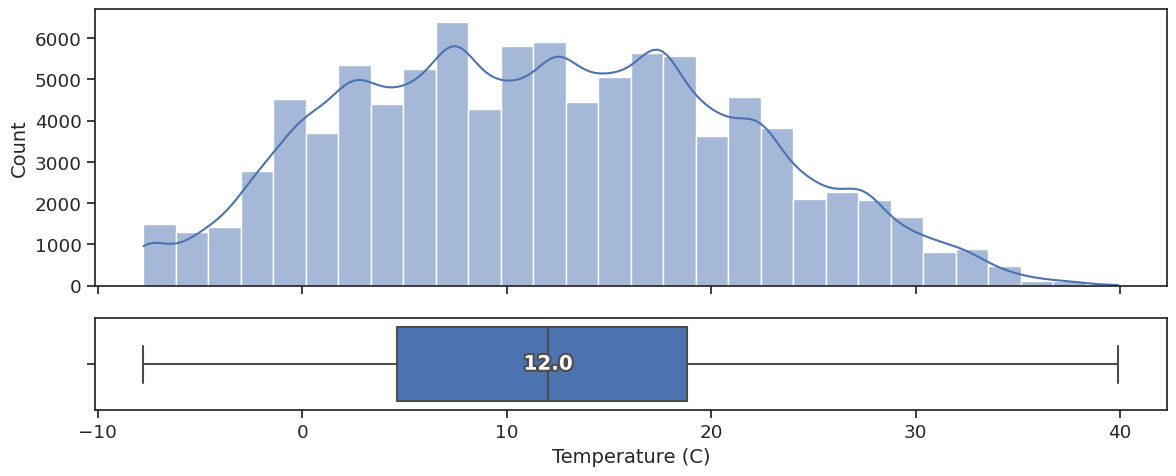

APPARENT TEMPERATURE (C)
skewness = -0.017047799583250825


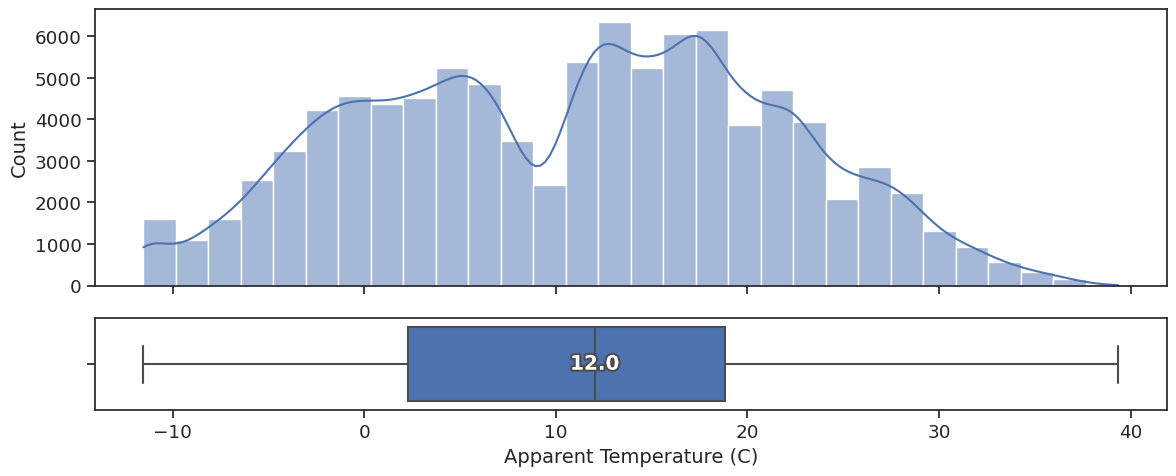

HUMIDITY
skewness = -0.6906655022797086


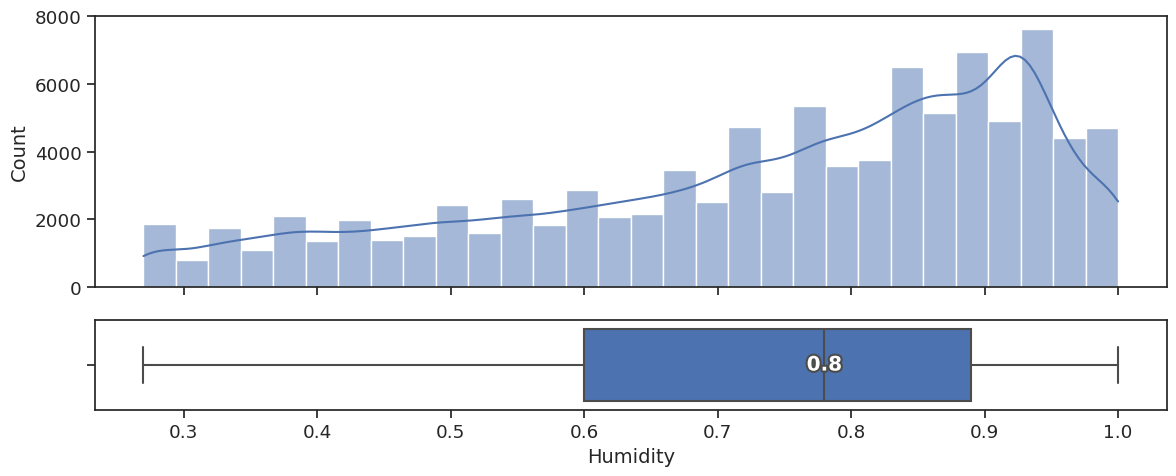

WIND SPEED (KM/H)
skewness = 1.11596168793163


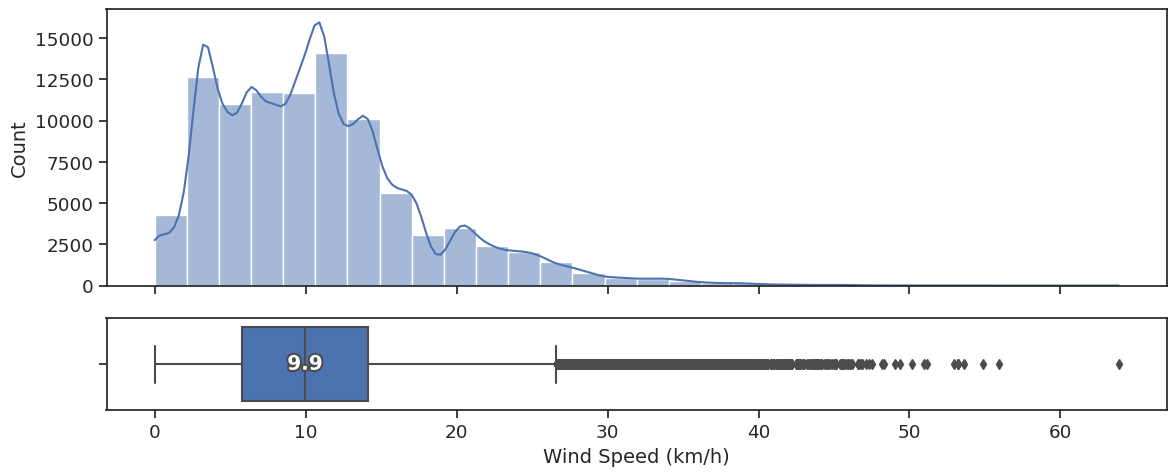

WIND BEARING (DEGREES)
skewness = -0.15480141397673977


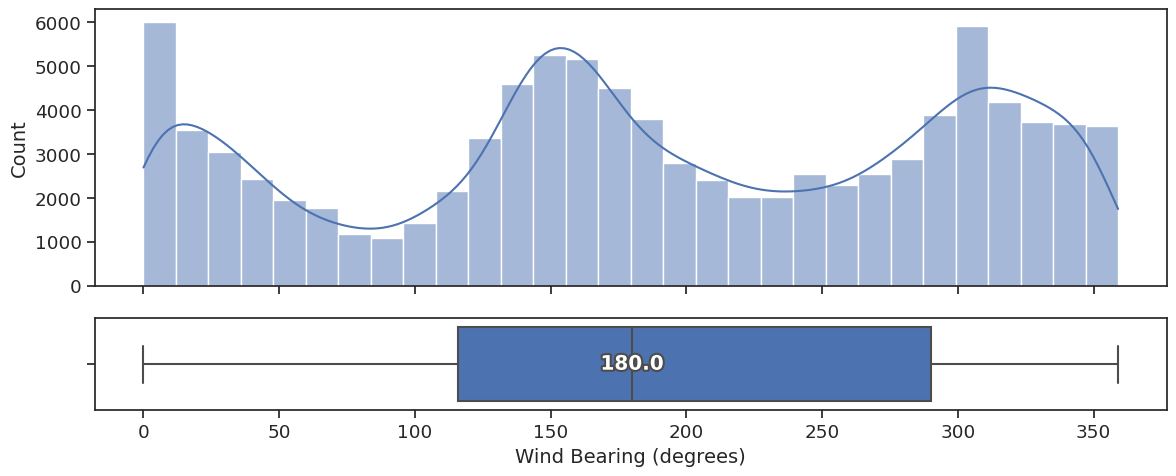

VISIBILITY (KM)
skewness = -0.4902492500345369


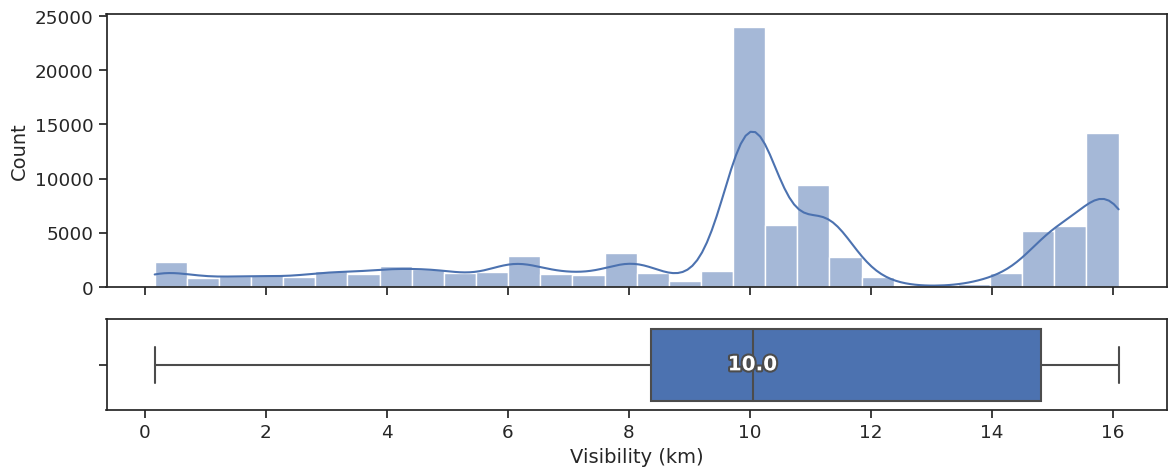

LOUD COVER
skewness = 0


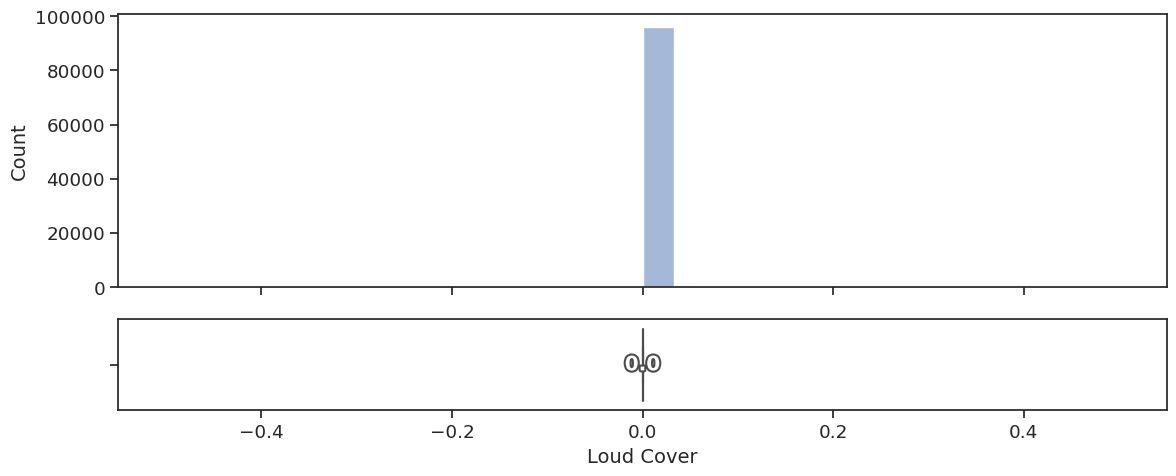

PRESSURE (MILLIBARS)
skewness = -8.40619396037087


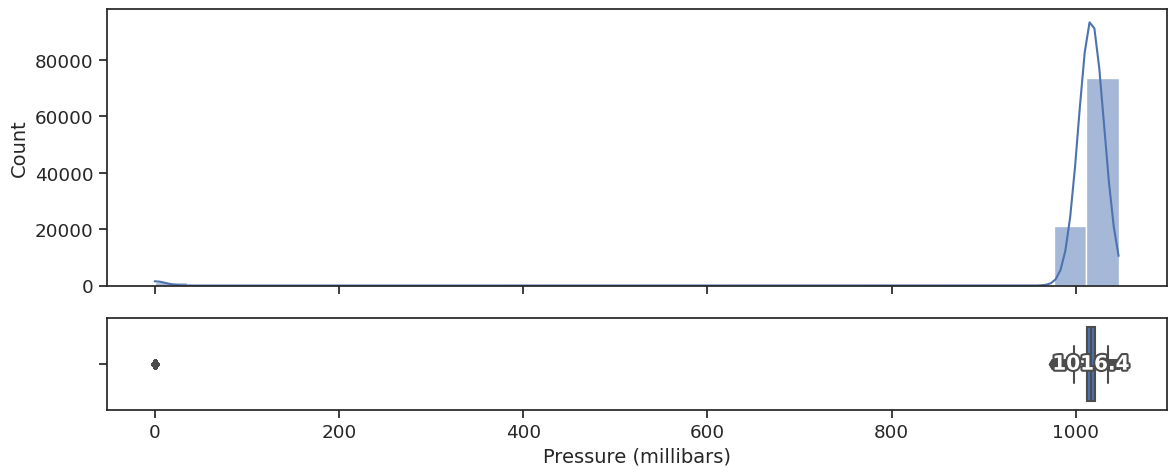

Summary
SUMMARY


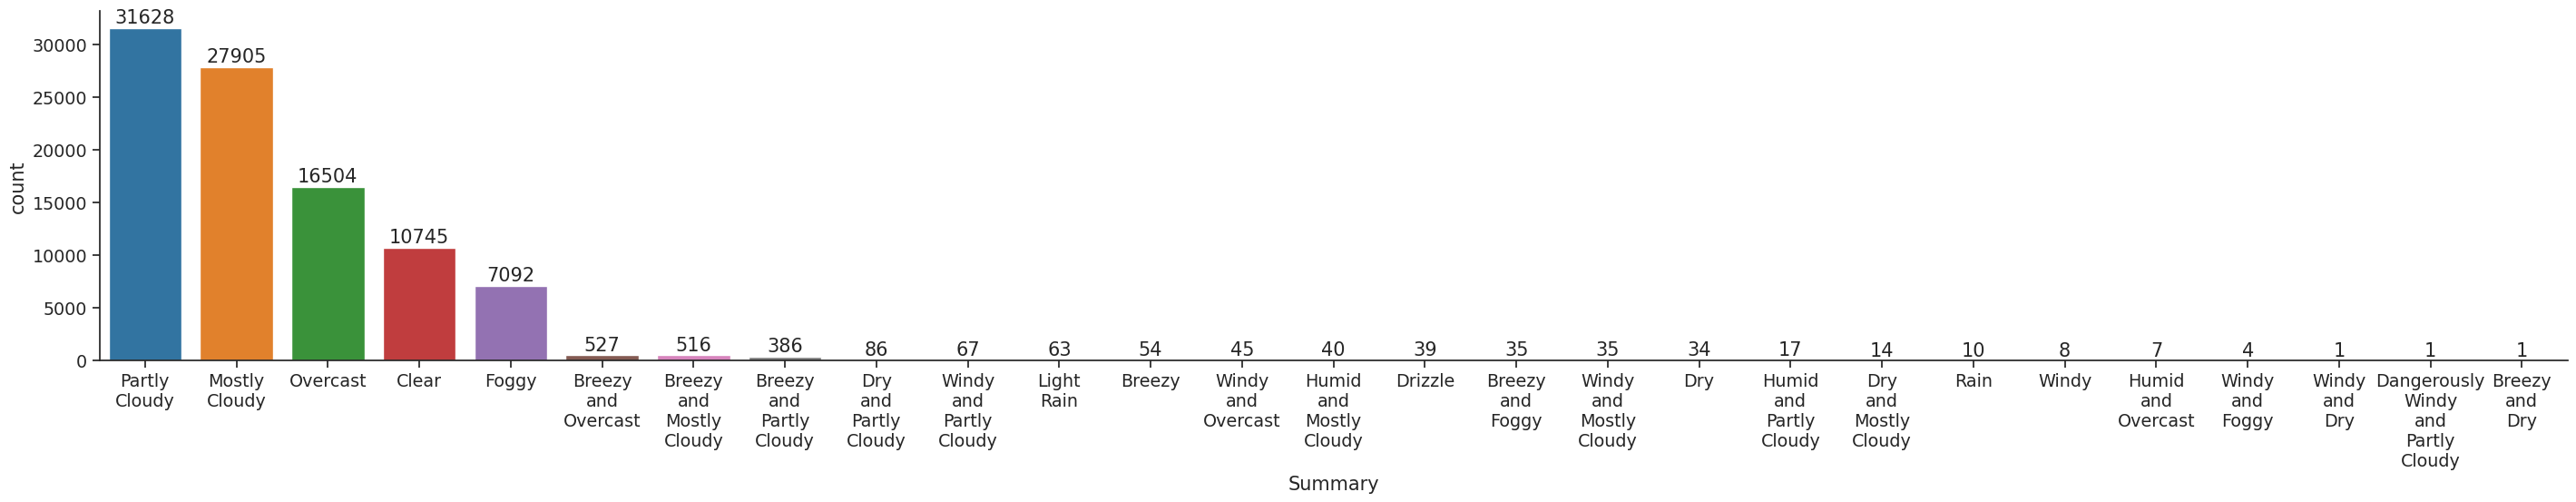

Precip Type
PRECIP TYPE


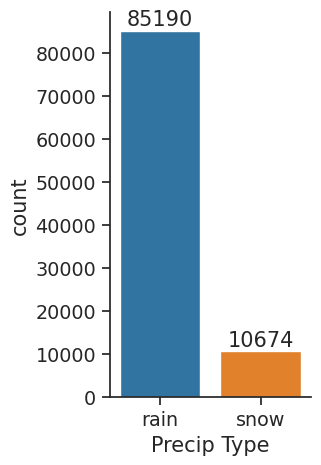

In [67]:
df = df_weather.copy()
cat_cols = df_weather.select_dtypes(['category']).columns
for i in df.columns:

    # Plotting for Continuous variables :
    if i in conti_cols:

        # Printing Skewness :
        print(i.upper(), '\nskewness = ', df.loc[:, i].skew(), sep='')

        # Setting rcParams :
        params = {'figure.figsize': (12, 5), 'axes.labelsize': 14}
        plt.rcParams.update(params)

        # Plotting histplot and boxplot :
        fig, axs = plt.subplots(2,
                                1,
                                sharex=True,
                                gridspec_kw={'height_ratios': [3, 1]})
        sns.histplot(data=df, x=i, kde=True, ax=axs[0], bins=30)
        g = sns.boxplot(x=df.loc[:, i], ax=axs[1], saturation=1)
        add_median_labels(g)
        fig.tight_layout()

        plt.show()

    # Plotting for Categorical variables :
    elif (i in cat_cols) and (df[i].nunique()<=50):

        print(i)

        # Setting rcParams :
        params = {
            'figure.figsize': (df[i].nunique() * 1.3, 5),
            'axes.labelsize': 14
        }
        plt.rcParams.update(params)
        sns.set(style='ticks', font_scale=1.25)

        # PLotting :
        print(i.upper())
        df[i] = df[i].astype(str)
        df[i] = df[i].str.replace(' ', '\n')
        plots = sns.countplot(x=i,
                              data=df,
                              order=df[i].value_counts().index,
                              palette='tab10')
        sns.despine()

        # Annonating :
        for bar in plots.patches:
            plots.annotate(
                str(format(bar.get_height(), '.0f')),
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center',
                va='center',
                size=15,
                xytext=(0, 8),
                textcoords='offset points')
        df[i] = df[i].str.replace('\n', ' ')

        # Converting back to categorical :
        df[i] = df[i].astype('category')

    else:
        pass
    plt.show()

# Correlation

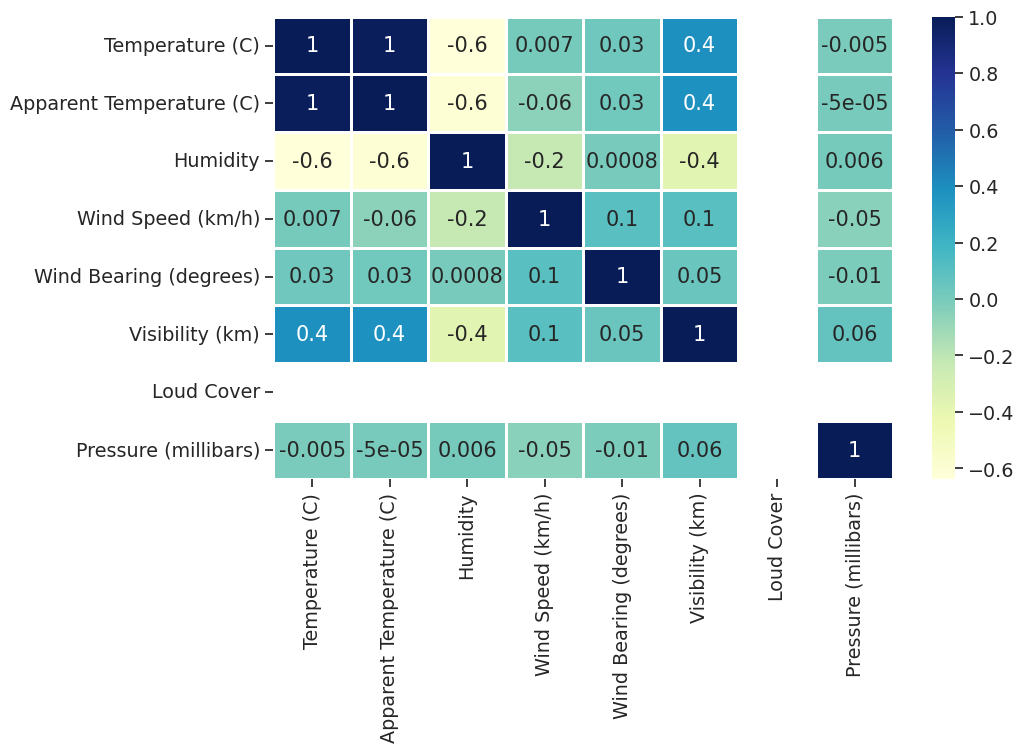

In [68]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(df[conti_cols].corr(),
            annot=True,
            linewidths=1,
            fmt='.1g',
            cmap='YlGnBu')
plt.show()

In [69]:
# Since the `Apparent Temperature (C)` is highly correlated with `Temperature (C)`, we need to drop `Apparent Temperature (C)` before proceeding further.
df.drop(columns=['Apparent Temperature (C)'], inplace=True)
df_weather = df

In [70]:
profile_report = pandas_profiling.ProfileReport(df)
profile_report.to_file('profile_report.html')
profile_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## **Encode categorical data**

In [71]:
# Encoding the target variable
target = 'Humidity'
final_cal_cols = df_weather.select_dtypes(['category']).columns.to_list()
print(f"""We have categories for the following columns only:
{final_cal_cols}
""")

# One-hot Encoding for the categorical columns :
df_weather = pd.get_dummies(df_weather,
                     columns=final_cal_cols,
                     prefix_sep="_",
                     drop_first=True)

df_weather.info()

We have categories for the following columns only:
['Summary', 'Precip Type']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95864 entries, 0 to 96452
Data columns (total 34 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Temperature (C)                              95864 non-null  float64
 1   Humidity                                     95864 non-null  float64
 2   Wind Speed (km/h)                            95864 non-null  float64
 3   Wind Bearing (degrees)                       95864 non-null  float64
 4   Visibility (km)                              95864 non-null  float64
 5   Loud Cover                                   95864 non-null  float64
 6   Pressure (millibars)                         95864 non-null  float64
 7   Summary_Breezy and Dry                       95864 non-null  uint8  
 8   Summary_Breezy and Foggy                     95864 non-null  uint8 

In [72]:
# identifying and dropping variables with zero variance and the target column
# as it has been tranformed into 'attack_class' and 'attack_flag'
data_summary = df_weather.describe()
zero_var_cols = data_summary.columns[data_summary.loc['std', :] == 0].tolist()
df_weather = df_weather.loc[:, df_weather.columns.difference(zero_var_cols)]
zero_var_cols

['Loud Cover']

In [ ]:
df_weather.columns

Index(['Humidity', 'Precip Type_snow', 'Pressure (millibars)',
       'Summary_Breezy and Dry', 'Summary_Breezy and Foggy',
       'Summary_Breezy and Mostly Cloudy', 'Summary_Breezy and Overcast',
       'Summary_Breezy and Partly Cloudy', 'Summary_Clear',
       'Summary_Dangerously Windy and Partly Cloudy', 'Summary_Drizzle',
       'Summary_Dry', 'Summary_Dry and Mostly Cloudy',
       'Summary_Dry and Partly Cloudy', 'Summary_Foggy',
       'Summary_Humid and Mostly Cloudy', 'Summary_Humid and Overcast',
       'Summary_Humid and Partly Cloudy', 'Summary_Light Rain',
       'Summary_Mostly Cloudy', 'Summary_Overcast', 'Summary_Partly Cloudy',
       'Summary_Rain', 'Summary_Windy', 'Summary_Windy and Dry',
       'Summary_Windy and Foggy', 'Summary_Windy and Mostly Cloudy',
       'Summary_Windy and Overcast', 'Summary_Windy and Partly Cloudy',
       'Temperature (C)', 'Visibility (km)', 'Wind Bearing (degrees)',
       'Wind Speed (km/h)'],
      dtype='object')

# **Standardization Techniques**

# Data Preparation

## Train Test Split

In [74]:
## Import all the necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [86]:
features=df_weather.drop(columns=['Humidity']).columns


In [87]:
## Import the dataset


# change the path as necessary

X =  df_weather[features]# copy all columns excluding last column
Y = df_weather['Humidity']   # copy the last column only

# View the size of the arrays X and Y
print(X.shape)
print(Y.shape)

(95864, 32)
(95864,)


In [89]:
data = df_weather.dropna()
X = data.drop(columns='Humidity')
y = data['Humidity']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=123)

In [90]:
# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (67104, 32)
X_test shape: (28760, 32)
y_train shape: (67104,)
y_test shape: (28760,)


In [91]:
algorithms = [
    ("Linear Regression", LinearRegression()),
    ("Random Forest Regression", RandomForestRegressor(random_state=42)),
    ("Support Vector Regression", SVR())
]

In [92]:
from sklearn.metrics import mean_squared_error, r2_score
models_comparison_train={}
for name, model in algorithms:
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)

    mse = mean_squared_error(y_train, y_train_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_train, y_train_pred)

    print(f"{name} - Training MSE: {mse:.2f}")
    print(f"{name} - Training RMSE: {rmse:.2f}")
    print(f"{name} - Training R2: {r2:.2f}")
    print("-" * 30)
    # Store data in models_comparision dictionary
    models_comparison_train[name] = [mse, rmse, r2]

Training Linear Regression...
Linear Regression - Training MSE: 0.02
Linear Regression - Training RMSE: 0.13
Linear Regression - Training R2: 0.53
------------------------------
Training Random Forest Regression...
Random Forest Regression - Training MSE: 0.00
Random Forest Regression - Training RMSE: 0.04
Random Forest Regression - Training R2: 0.96
------------------------------
Training Support Vector Regression...
Support Vector Regression - Training MSE: 0.02
Support Vector Regression - Training RMSE: 0.13
Support Vector Regression - Training R2: 0.53
------------------------------


## 3.4 Text data

1. Remove special characters
2. Change the case (up-casing and down-casing).
3. Tokenization — process of discretizing words within a document.
4. Filter Stop Words.

## 3.4 Report

Mention and justify the method adopted
* to remove duplicate data, if present
* to impute or remove missing data, if present
* to remove data inconsistencies, if present

OR for textdata
* How many tokens after step 3?
* how may tokens after stop words filtering?

If the any of the above are not present, then also add in the report below.

Score: 2 Marks (based on the dataset you have, the data prepreation you had to do and report typed, marks will be distributed between 3.1, 3.2, 3.3 and 3.4)

## 3.5 Identify the target variables.

* Separate the data from the target such that the dataset is in the form of (X,y) or (Features, Label)

* Discretize / Encode the target variable or perform one-hot encoding on the target or any other as and if required.

* Report the observations

Score: 1 Mark



Since we are solving two types of problem here we have two target variables here :

1. For detecting anomalies by predicting Activity is normal or attack : the **`attack_flag`** column is the target variable in **Binomial classification**.
2. For classifying the type of attack : the **`attack_class`** column is the target variable in **Multinomial Classification**.

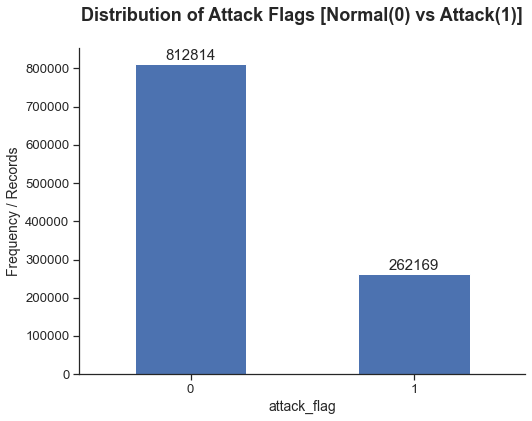

In [ ]:
# Getting the distribution of attack_flag [Binomial Classification]
params = {'figure.figsize': (8, 6), 'axes.labelsize': 14}
plt.rcParams.update(params)
plots = df_weather.attack_flag.value_counts().plot(kind='bar')
plt.xlabel('attack_flag')
plt.ylabel('Frequency / Records')
plt.title('Distribution of Attack Flags [Normal(0) vs Attack(1)]\n',
          fontdict={
              'fontsize': 18,
              'fontweight': 'bold'
          })
plt.xticks(rotation=0)
for bar in plots.patches:
    plots.annotate(str(format(bar.get_height(), '.0f')),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   ha='center',
                   va='center',
                   size=15,
                   xytext=(0, 8),
                   textcoords='offset points')
sns.despine()
plt.show()

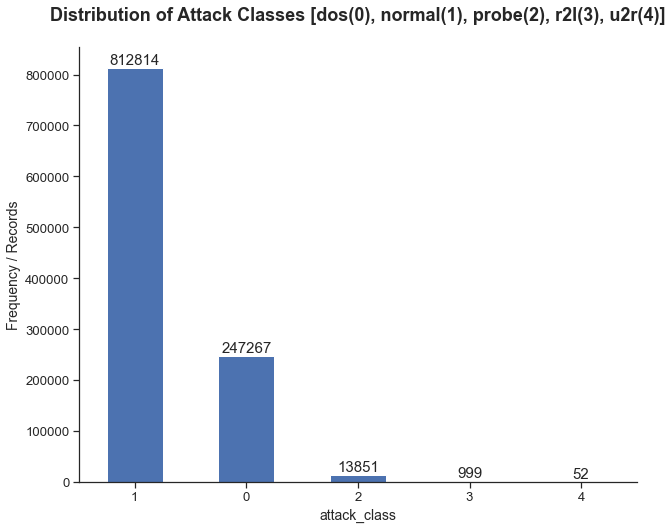

In [ ]:
# Getting the distribution of attack_class [Multinomial Classification]
params = {'figure.figsize': (10, 8), 'axes.labelsize': 14}
plt.rcParams.update(params)
plots = df_weather.attack_class.value_counts().plot(kind='bar')
plt.xlabel('attack_class')
plt.ylabel('Frequency / Records')
plt.title(
    'Distribution of Attack Classes [dos(0), normal(1), probe(2), r2l(3), u2r(4)]\n',
    fontdict={
        'fontsize': 18,
        'fontweight': 'bold'
    })
plt.xticks(rotation=0)
for bar in plots.patches:
    plots.annotate(str(format(bar.get_height(), '.0f')),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   ha='center',
                   va='center',
                   size=15,
                   xytext=(0, 8),
                   textcoords='offset points')
sns.despine()
plt.show()

# 4. Data Exploration using various plots



## 4.1 Scatter plot of each quantitative attribute with the target.

Score: 1 Mark


COUNT vs ATTACK_CLASS


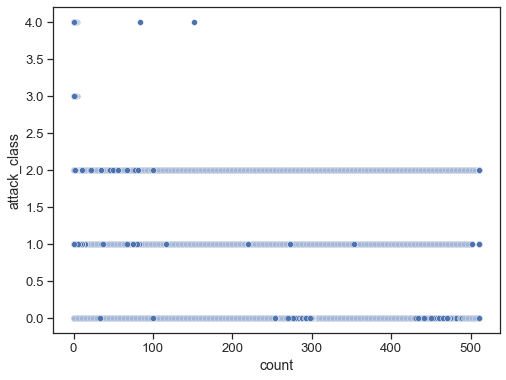


DIFF_SRV_RATE vs ATTACK_CLASS


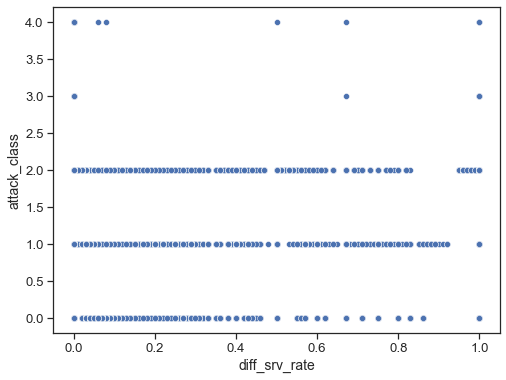


DST_BYTES vs ATTACK_CLASS


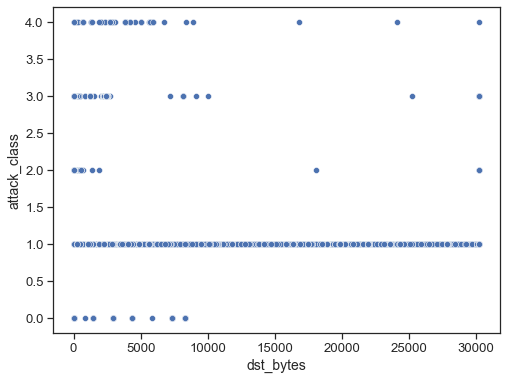


DST_HOST_COUNT vs ATTACK_CLASS


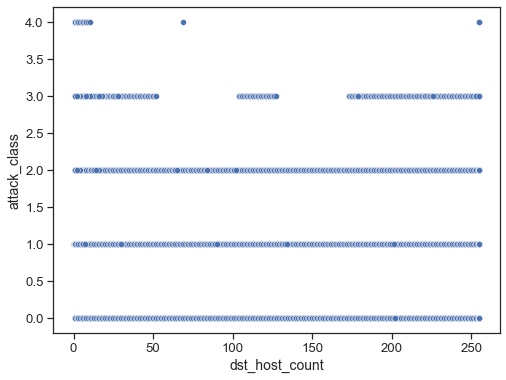


DST_HOST_DIFF_SRV_RATE vs ATTACK_CLASS


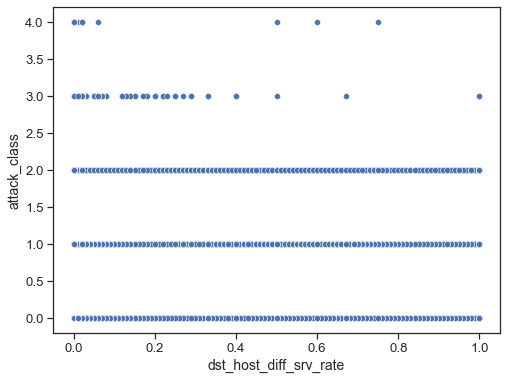


DST_HOST_RERROR_RATE vs ATTACK_CLASS


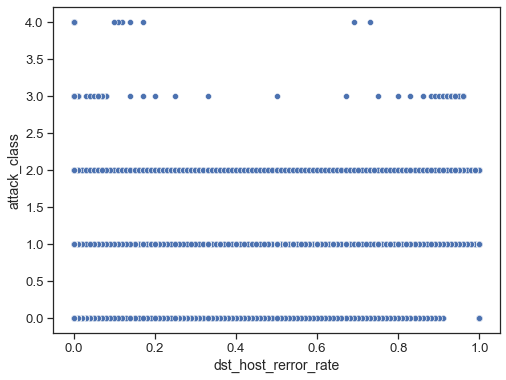


DST_HOST_SAME_SRC_PORT_RATE vs ATTACK_CLASS


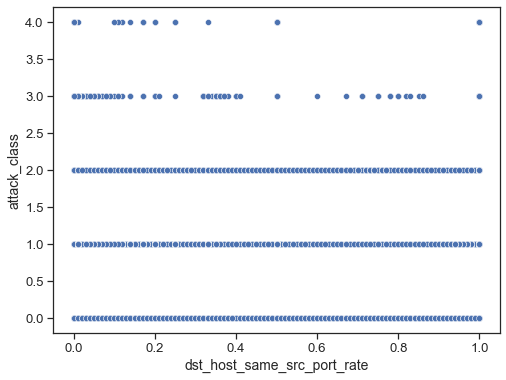


DST_HOST_SAME_SRV_RATE vs ATTACK_CLASS


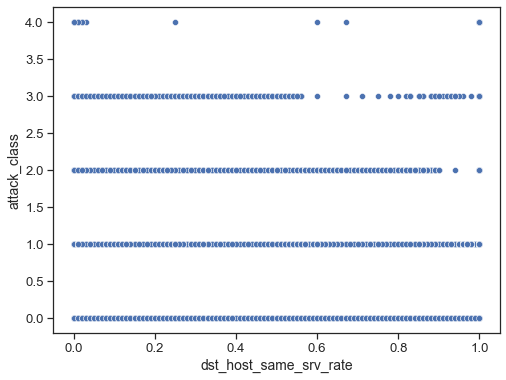


DST_HOST_SERROR_RATE vs ATTACK_CLASS


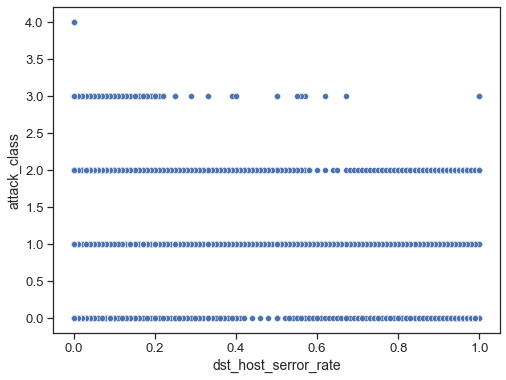


DST_HOST_SRV_COUNT vs ATTACK_CLASS


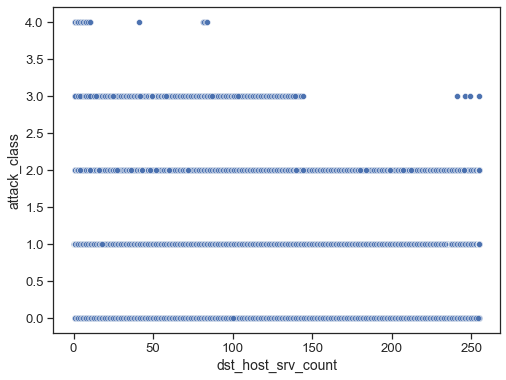


DST_HOST_SRV_DIFF_HOST_RATE vs ATTACK_CLASS


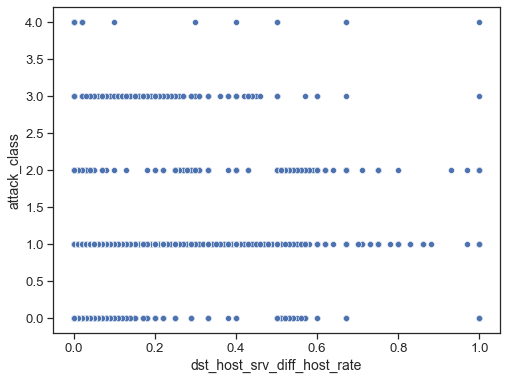


DST_HOST_SRV_RERROR_RATE vs ATTACK_CLASS


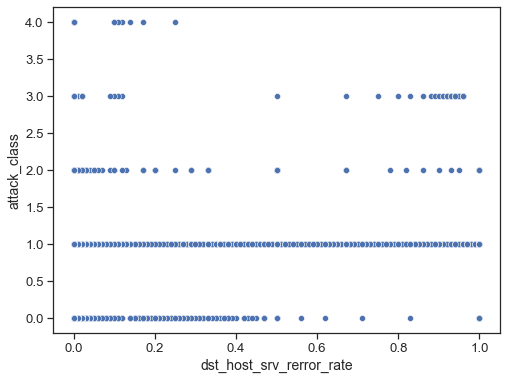


DST_HOST_SRV_SERROR_RATE vs ATTACK_CLASS


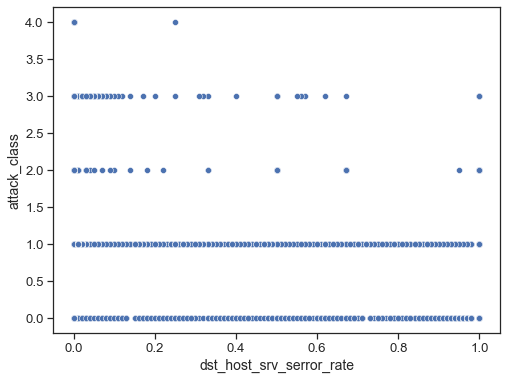


DURATION vs ATTACK_CLASS


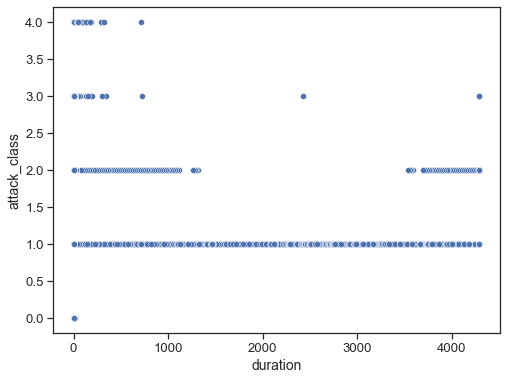


HOT vs ATTACK_CLASS


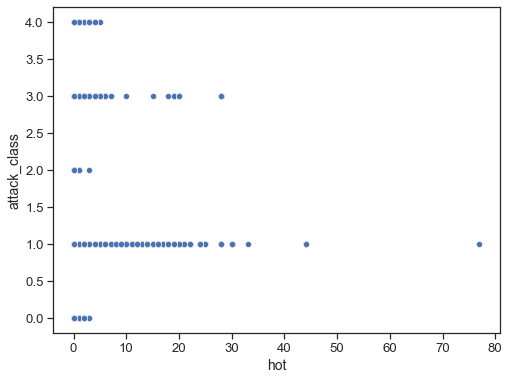


IS_GUEST_LOGIN vs ATTACK_CLASS


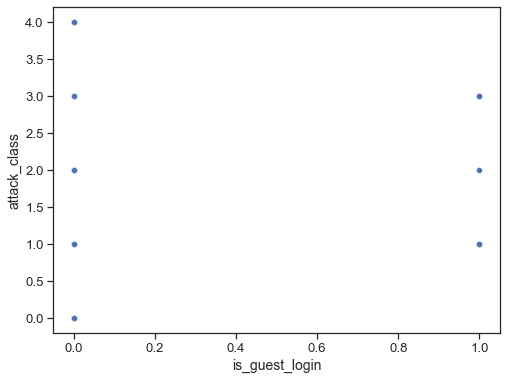


IS_HOST_LOGIN vs ATTACK_CLASS


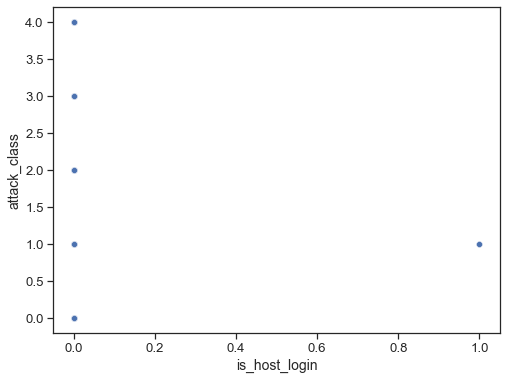


LAND vs ATTACK_CLASS


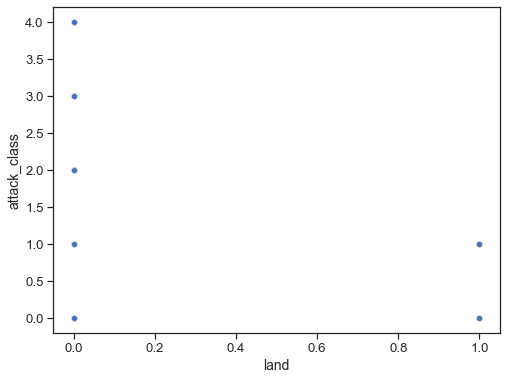


LOGGED_IN vs ATTACK_CLASS


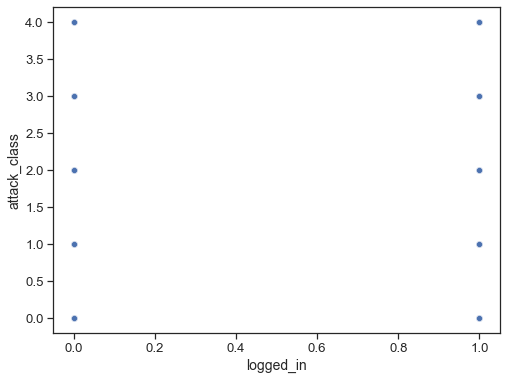


NUM_ACCESS_FILES vs ATTACK_CLASS


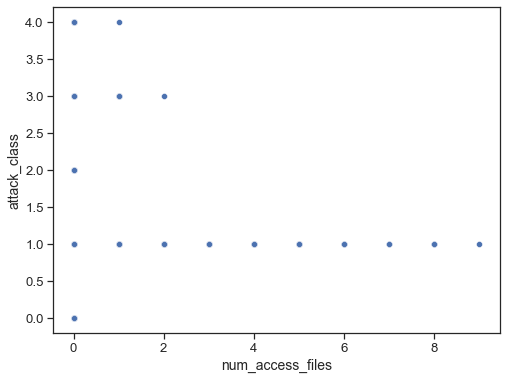


NUM_COMPROMISED vs ATTACK_CLASS


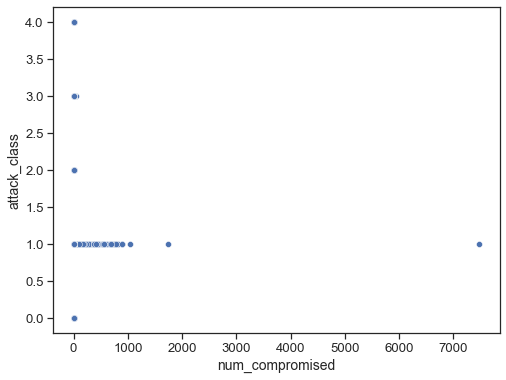


NUM_FAILED_LOGINS vs ATTACK_CLASS


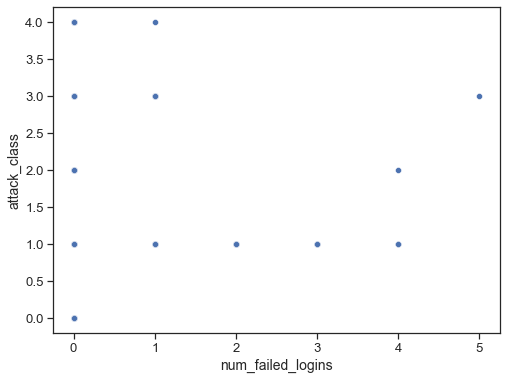


NUM_FILE_CREATIONS vs ATTACK_CLASS


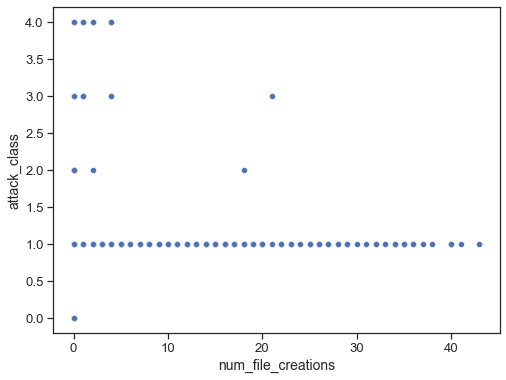


NUM_ROOT vs ATTACK_CLASS


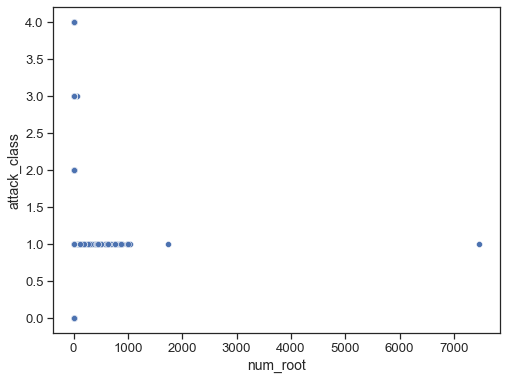


NUM_SHELLS vs ATTACK_CLASS


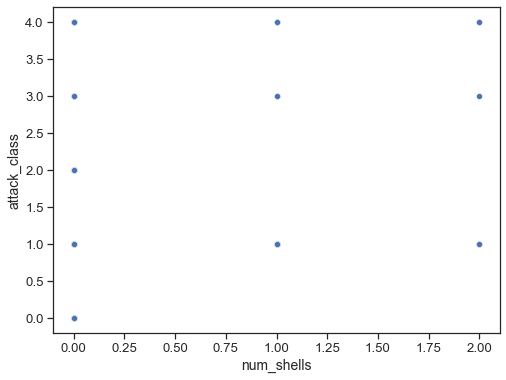


RERROR_RATE vs ATTACK_CLASS


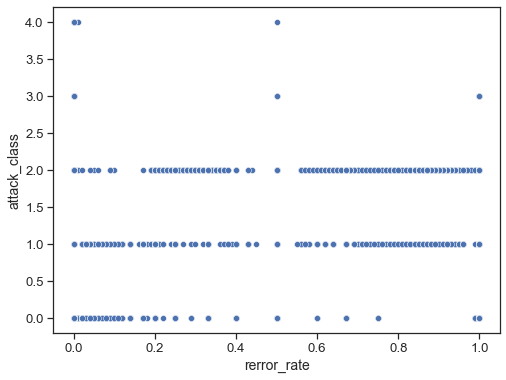


ROOT_SHELL vs ATTACK_CLASS


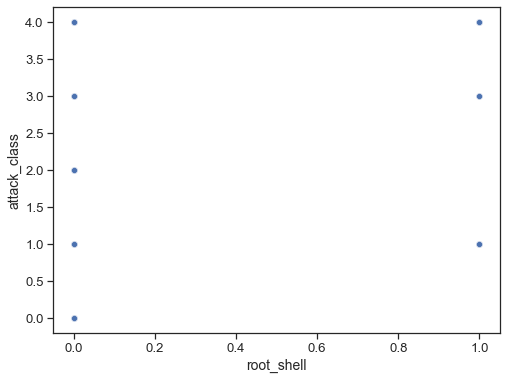


SAME_SRV_RATE vs ATTACK_CLASS


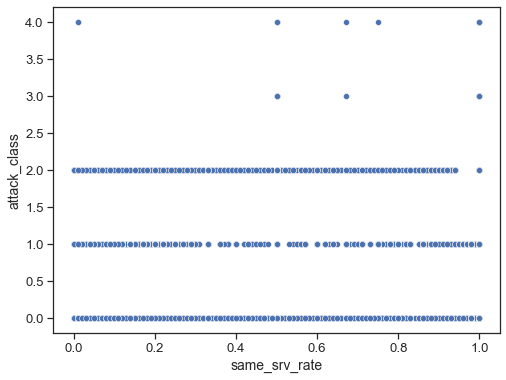


SERROR_RATE vs ATTACK_CLASS


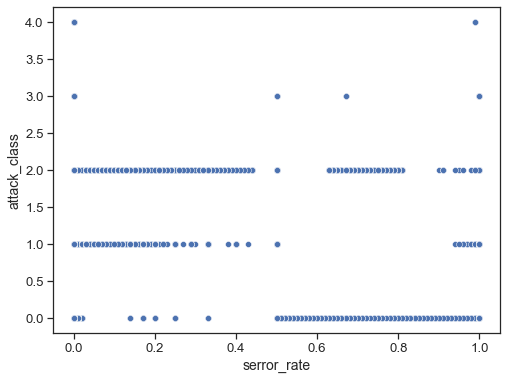


SRC_BYTES vs ATTACK_CLASS


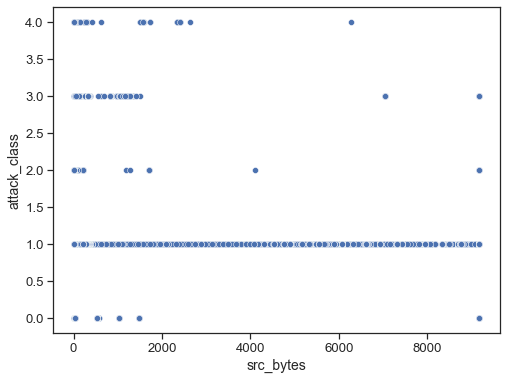


SRV_COUNT vs ATTACK_CLASS


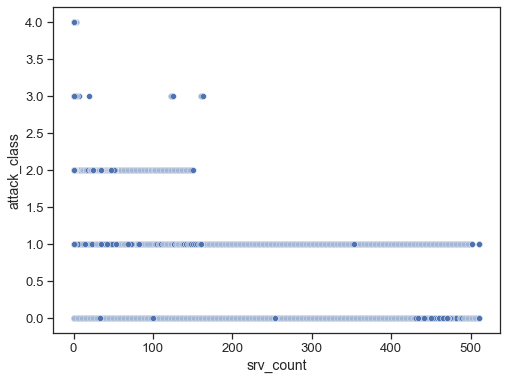


SRV_DIFF_HOST_RATE vs ATTACK_CLASS


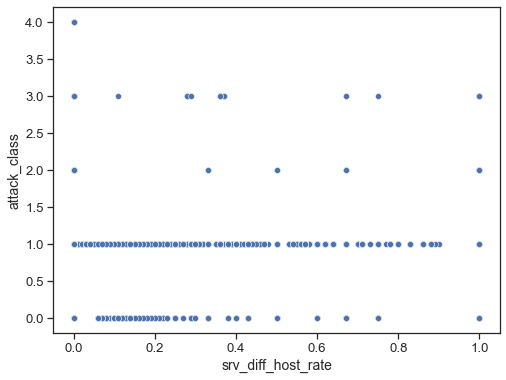


SRV_RERROR_RATE vs ATTACK_CLASS


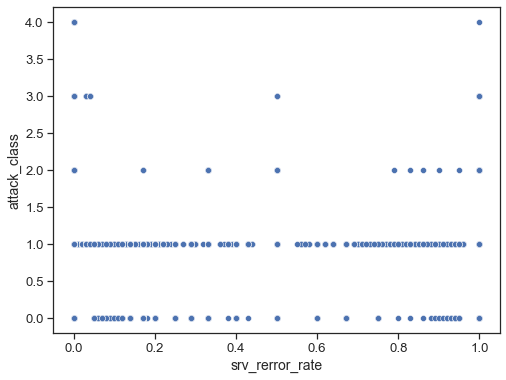


SRV_SERROR_RATE vs ATTACK_CLASS


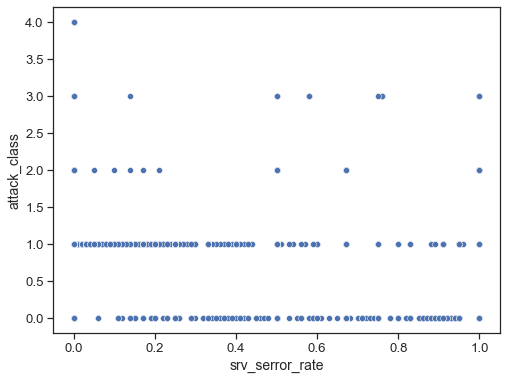


SU_ATTEMPTED vs ATTACK_CLASS


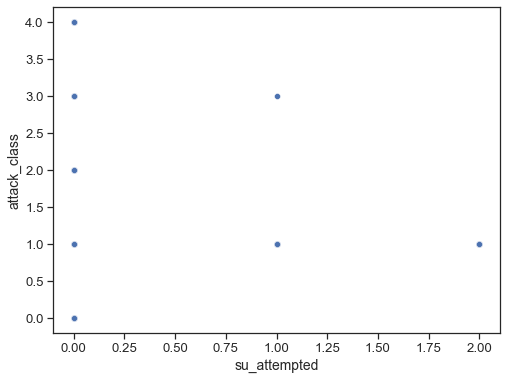


URGENT vs ATTACK_CLASS


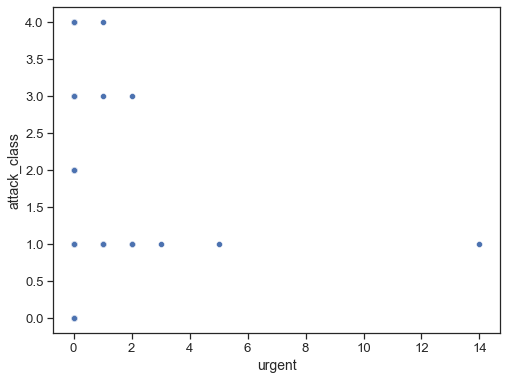


WRONG_FRAGMENT vs ATTACK_CLASS


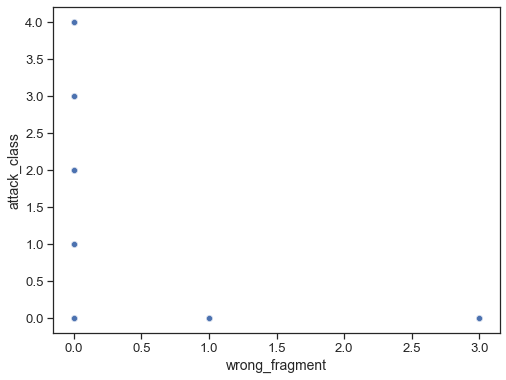

In [ ]:

for col in df_weather.select_dtypes(['int64', 'float64']).columns:
    if col not in ['attack_flag', 'attack_class']:
        print(f'\n{col.upper()} vs ATTACK_CLASS')
        params = {'figure.figsize': (8, 6), 'axes.labelsize': 14}
        plt.rcParams.update(params)
        sns.scatterplot(x=col, y='attack_class', data=df_weather)
        plt.show()

## 4.2 EDA using visuals
* Use (minimum) 2 plots (pair plot, heat map, correlation plot, regression plot...) to identify the optimal set of attributes that can be used for classification.
* Name them, explain why you think they can be helpful in the task and perform the plot as well. Unless proper justification for the choice of plots given, no credit will be awarded.

Score: 2 Marks

### Plot 1 : Correlation Heatmap

**Justification**:
We have chosen correlation heatmap because its a proper visualization of Pearson Correlation coefficient between two continuous variables with values [-1, 1]. If the absolute value is greater than 0.5 then we can say those two variables are highly correlated and if the value is less than 0.5 then correlation between those variables are low.

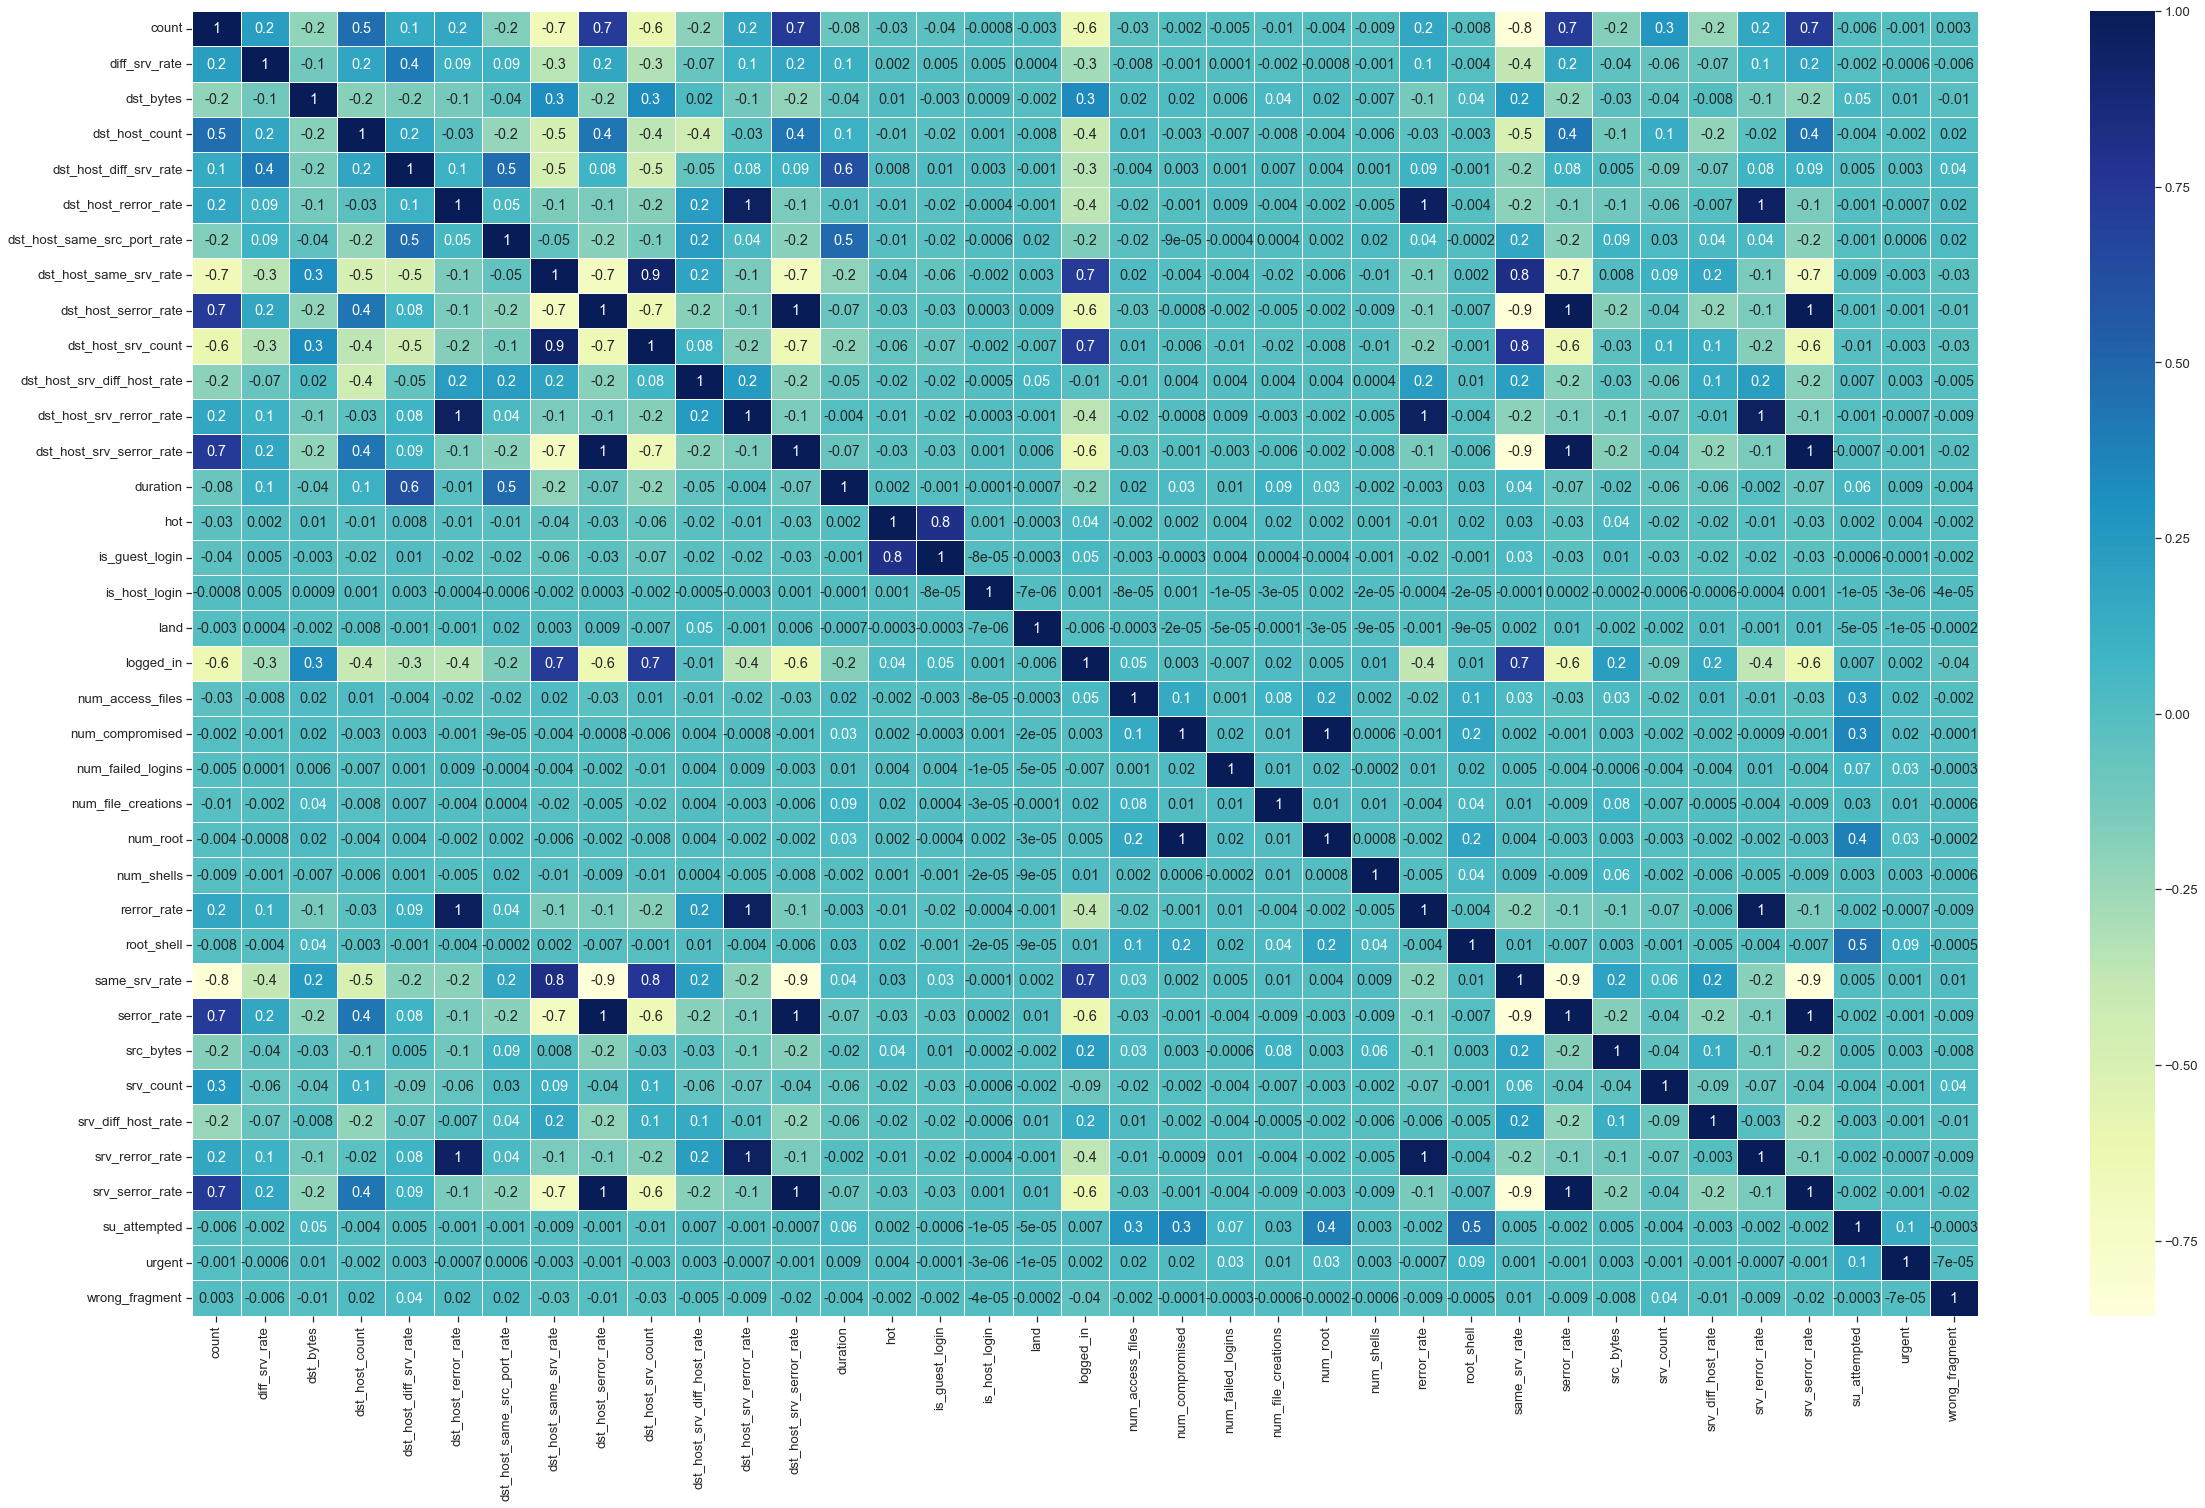

In [ ]:

# Correlation Heatmap :
fig, ax = plt.subplots(figsize=(40, 24))
sns.heatmap(df_weather.select_dtypes(['int64', 'float64']).corr(),
            annot=True,
            linewidths=.5,
            fmt='.1g',
            cmap='YlGnBu')
plt.show()


In [ ]:
# Getting columns with high correlation with other cols
df_corr = df_weather.select_dtypes(['int64', 'float64']).corr()
df_corr = df_corr[abs(df_corr) > 0.5]
df_corr = pd.DataFrame(np.where(df_corr == 1, np.NaN, df_corr),
                       columns=df_corr.columns,
                       index=df_corr.index)
corr_cols = df_corr.notnull().sum()[df_corr.notnull().sum() > 0].sort_values(
    ascending=False)
print(
    f'The following columns are showing high correlation with other cols: \n{corr_cols} '
)
corr_cols_dict = {
    x: df_corr.columns[df_corr.loc[x, :].notnull()]
    for x in corr_cols.index
}

The following columns are showing high correlation with other cols: 
count                       8
dst_host_srv_serror_rate    8
serror_rate                 8
same_srv_rate               8
logged_in                   8
srv_serror_rate             8
dst_host_srv_count          8
dst_host_serror_rate        8
dst_host_same_srv_rate      8
dst_host_srv_rerror_rate    3
rerror_rate                 3
dst_host_rerror_rate        3
srv_rerror_rate             3
duration                    1
dst_host_diff_srv_rate      1
is_guest_login              1
num_compromised             1
num_root                    1
hot                         1
dtype: int64 


So, the above list signifies these are very important features to look forward in the model building process as these variables carries the significance of the other less important variables.

In [ ]:
#sns.pairplot(df_weather.drop(columns=['attack_flag', 'attack_class']), hue='attack_class')

### Plot 2 : Joint Plots

**Justification**:
Since we have very large no. of columns here, we chose joint plots between only highly correlated variables to observe and relationship between these two variables in a better way instead of pairplot which took a huge amount of time and was not feasible to perform in this process.


DST_HOST_SAME_SRV_RATE vs COUNT : -0.6624654760161982


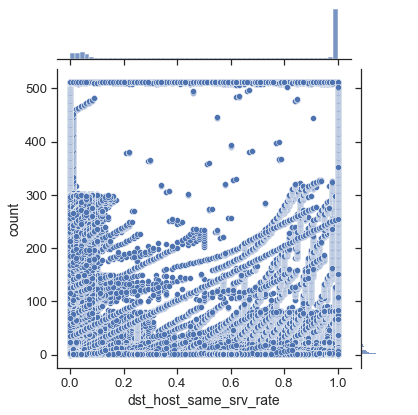


DST_HOST_SERROR_RATE vs COUNT : 0.7282857730730657


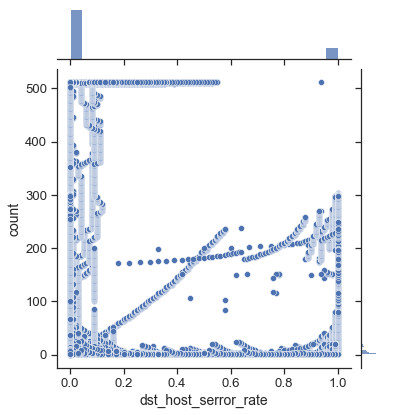


DST_HOST_SRV_COUNT vs COUNT : -0.6006824217096359


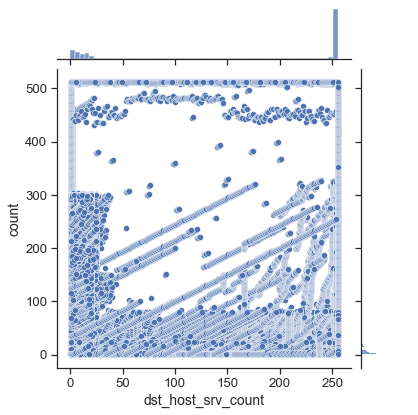


DST_HOST_SRV_SERROR_RATE vs COUNT : 0.7343004761229317


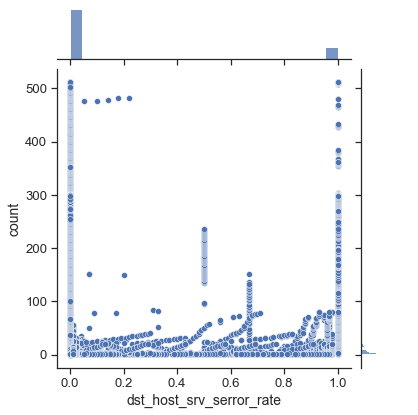


LOGGED_IN vs COUNT : -0.6305990334087197


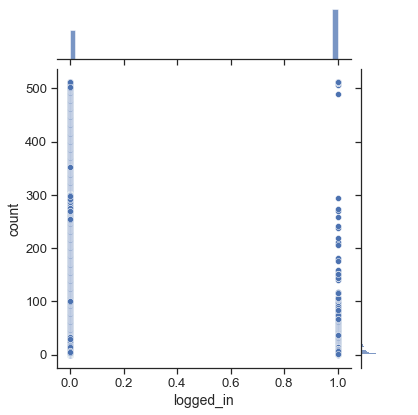


SAME_SRV_RATE vs COUNT : -0.8396085527251883


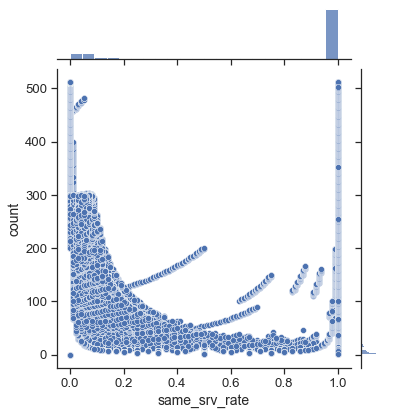


SERROR_RATE vs COUNT : 0.728236301008976


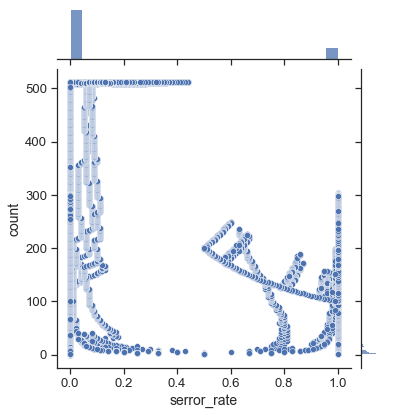


SRV_SERROR_RATE vs COUNT : 0.732514752513438


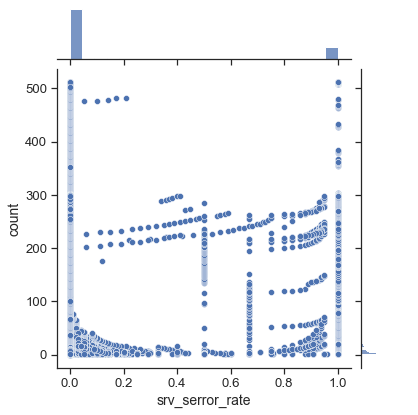


DST_HOST_SRV_SERROR_RATE vs DST_HOST_SAME_SRV_RATE : -0.7094342408938445


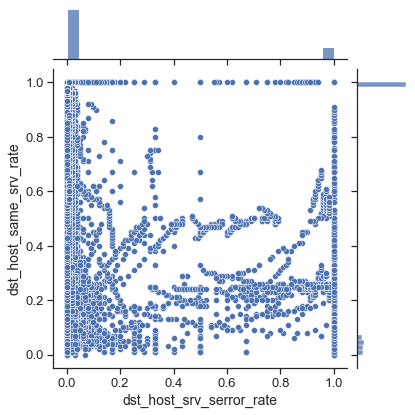


DST_HOST_SRV_SERROR_RATE vs DST_HOST_SERROR_RATE : 0.9951320047352745


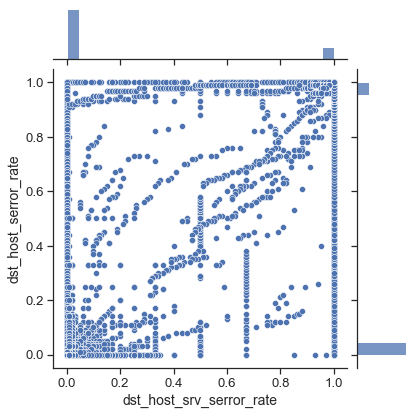


DST_HOST_SRV_SERROR_RATE vs DST_HOST_SRV_COUNT : -0.6514713611704785


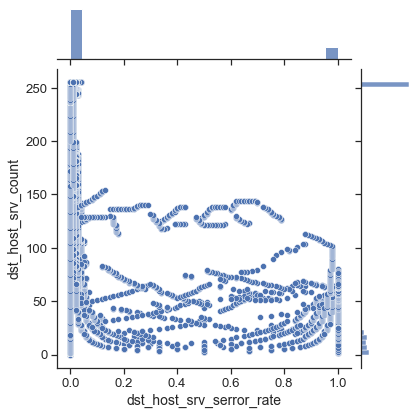


DST_HOST_SRV_SERROR_RATE vs LOGGED_IN : -0.6295758168431932


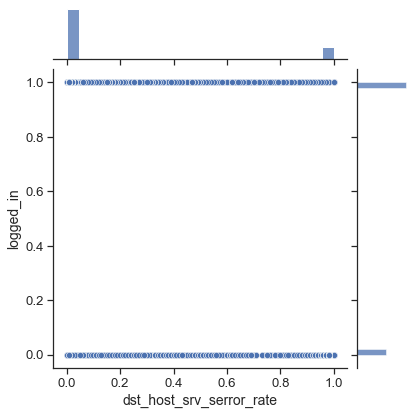


DST_HOST_SRV_SERROR_RATE vs SAME_SRV_RATE : -0.8567954079762081


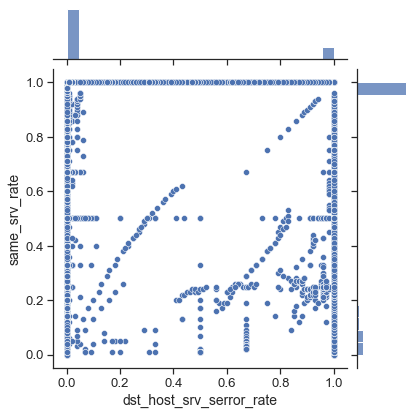


DST_HOST_SRV_SERROR_RATE vs SERROR_RATE : 0.9949383014135352


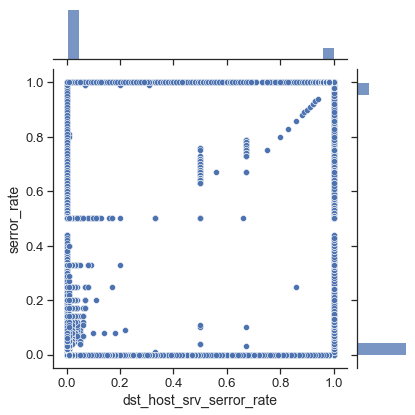


DST_HOST_SRV_SERROR_RATE vs SRV_SERROR_RATE : 0.9973893189584524


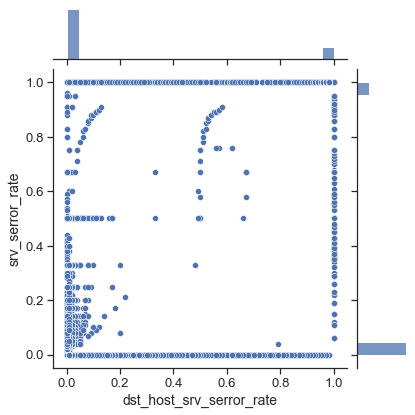


SERROR_RATE vs DST_HOST_SAME_SRV_RATE : -0.7066909980338415


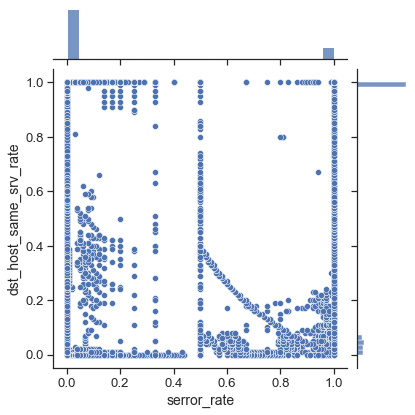


SERROR_RATE vs DST_HOST_SERROR_RATE : 0.9958000676445545


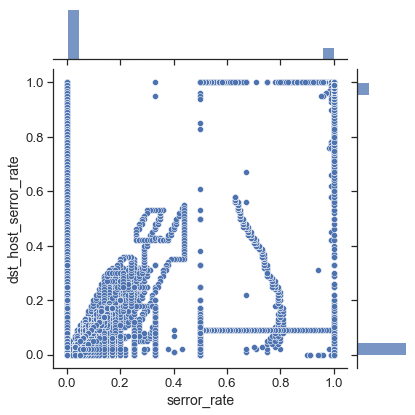


SERROR_RATE vs DST_HOST_SRV_COUNT : -0.6487492990682105


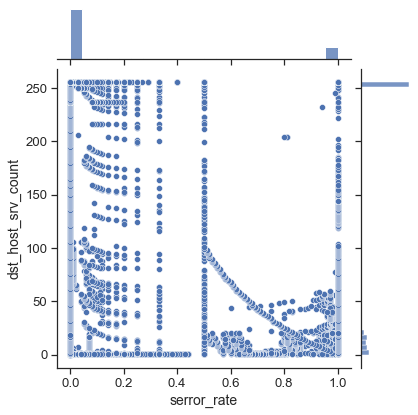


SERROR_RATE vs LOGGED_IN : -0.6290208302433261


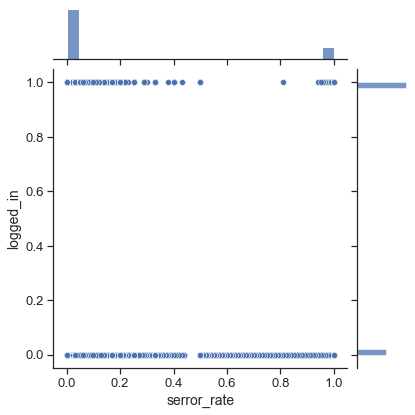


SERROR_RATE vs SAME_SRV_RATE : -0.8547483538357157


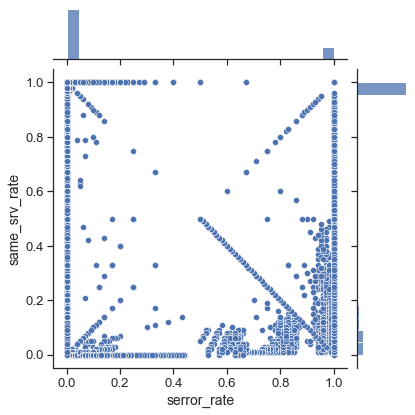


SRV_SERROR_RATE vs SERROR_RATE : 0.9968292878454098


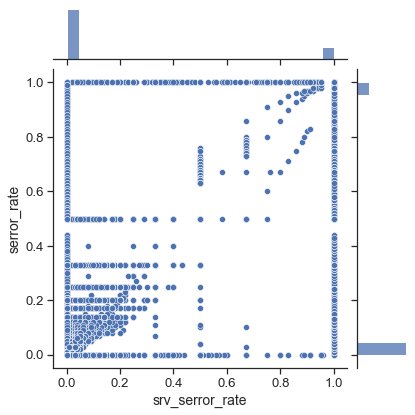


SAME_SRV_RATE vs DST_HOST_SAME_SRV_RATE : 0.8228988952964764


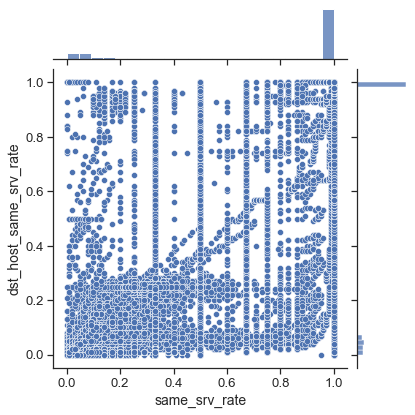


SAME_SRV_RATE vs DST_HOST_SERROR_RATE : -0.8541380649358873


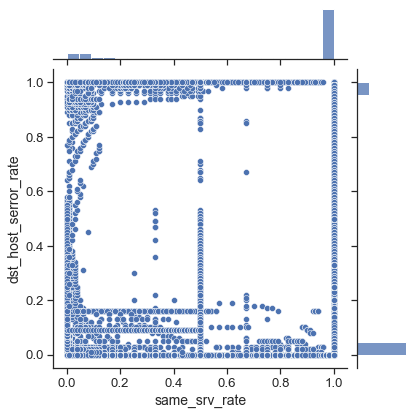


SAME_SRV_RATE vs DST_HOST_SRV_COUNT : 0.7563313552275036


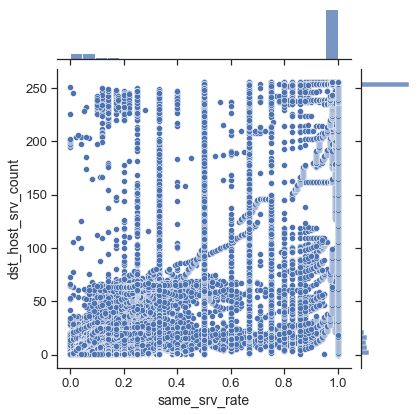


SAME_SRV_RATE vs LOGGED_IN : 0.7233310131335604


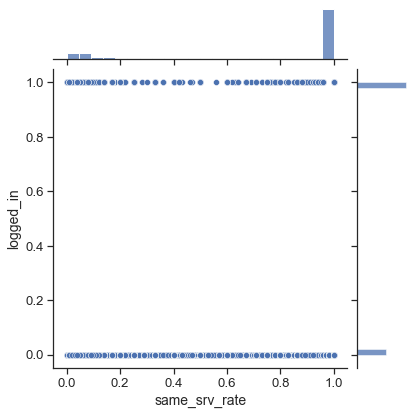


SRV_SERROR_RATE vs SAME_SRV_RATE : -0.8550830435186864


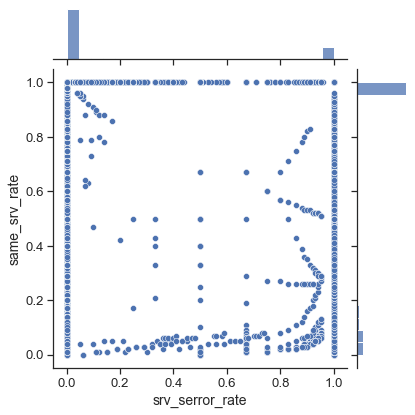


DST_HOST_SAME_SRV_RATE vs LOGGED_IN : 0.7313734136718647


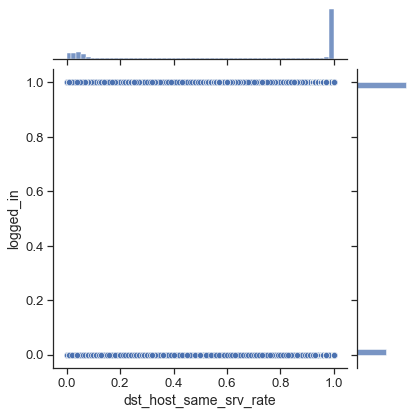


DST_HOST_SERROR_RATE vs LOGGED_IN : -0.628589323913067


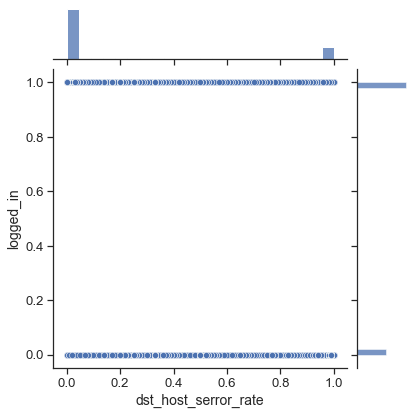


DST_HOST_SRV_COUNT vs LOGGED_IN : 0.728547065183806


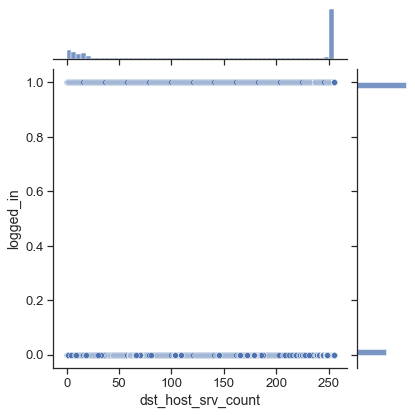


SRV_SERROR_RATE vs LOGGED_IN : -0.6289560748486731


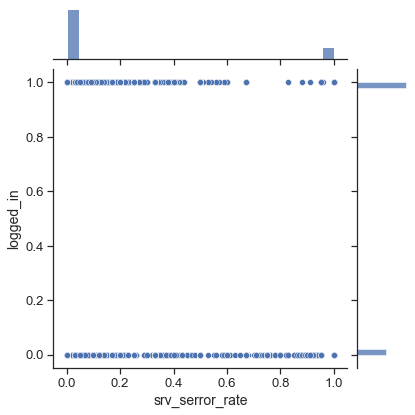


SRV_SERROR_RATE vs DST_HOST_SAME_SRV_RATE : -0.7067766932662387


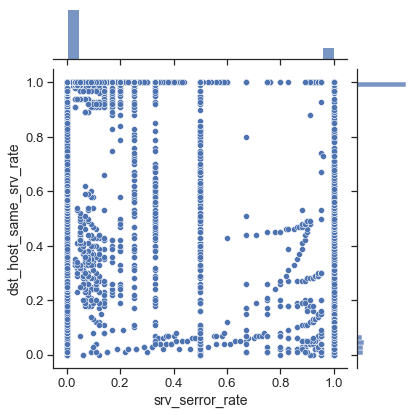


SRV_SERROR_RATE vs DST_HOST_SERROR_RATE : 0.9936509865444131


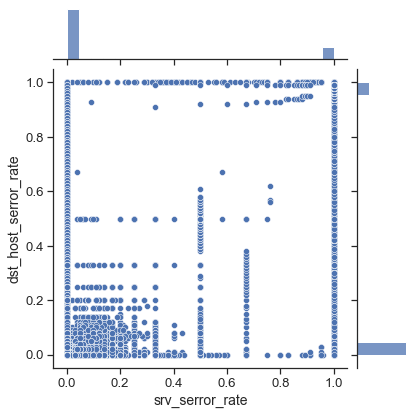


SRV_SERROR_RATE vs DST_HOST_SRV_COUNT : -0.6488173370135829


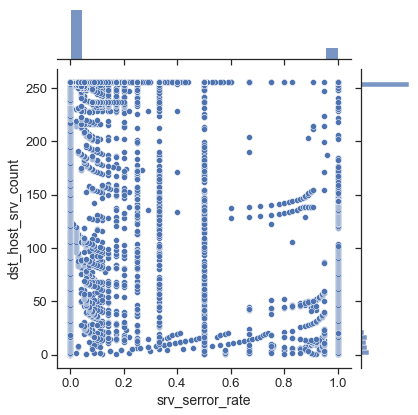


DST_HOST_SRV_COUNT vs DST_HOST_SAME_SRV_RATE : 0.931814041587654


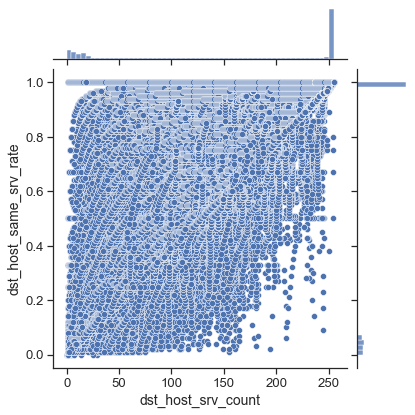


DST_HOST_SRV_COUNT vs DST_HOST_SERROR_RATE : -0.6518494235343301


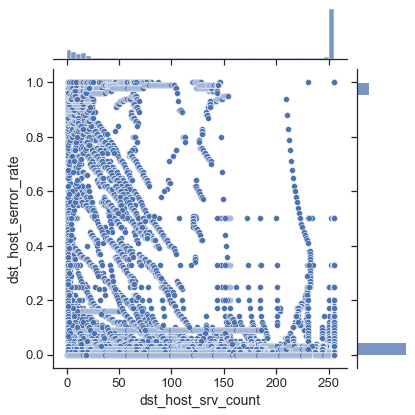


DST_HOST_SAME_SRV_RATE vs DST_HOST_SERROR_RATE : -0.7101206729781541


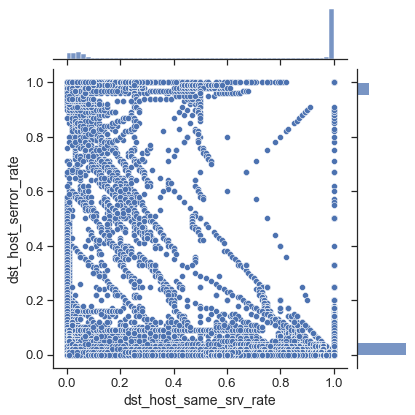


DST_HOST_SRV_RERROR_RATE vs DST_HOST_RERROR_RATE : 0.9612464316595003


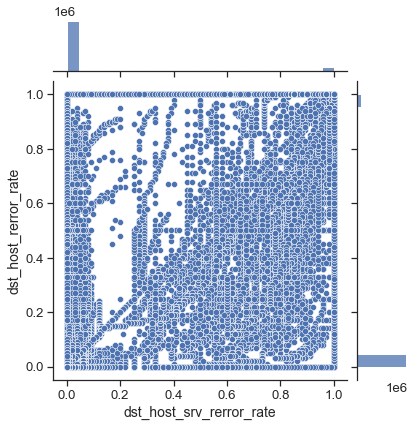


RERROR_RATE vs DST_HOST_SRV_RERROR_RATE : 0.9585239427922401


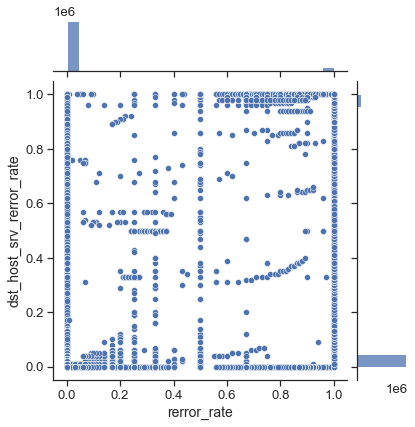


DST_HOST_SRV_RERROR_RATE vs SRV_RERROR_RATE : 0.9595431065679948


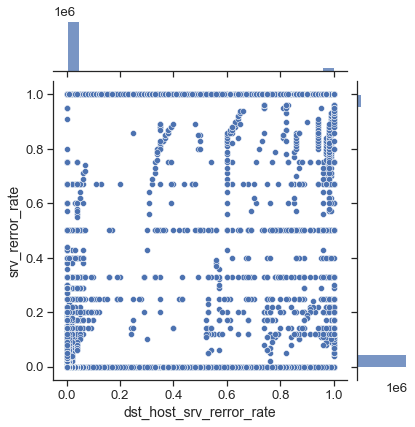


RERROR_RATE vs DST_HOST_RERROR_RATE : 0.9658400029284975


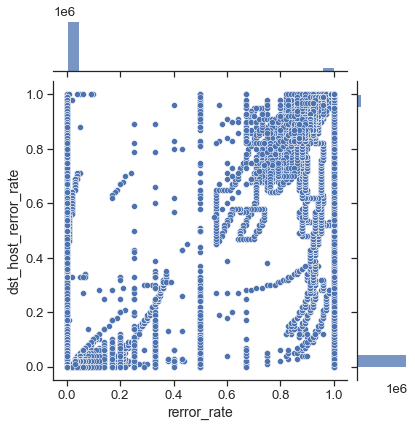


RERROR_RATE vs SRV_RERROR_RATE : 0.9895908791064101


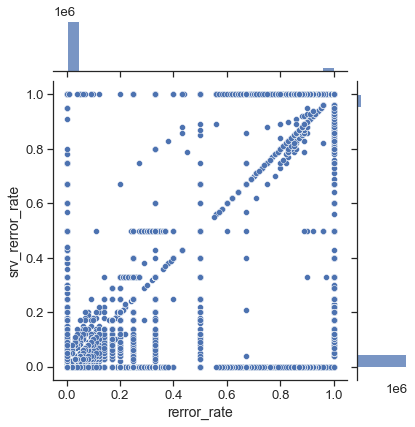


SRV_RERROR_RATE vs DST_HOST_RERROR_RATE : 0.9564016299704402


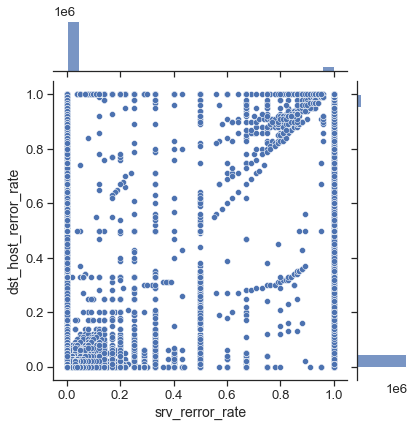


DST_HOST_DIFF_SRV_RATE vs DURATION : 0.6147339387728739


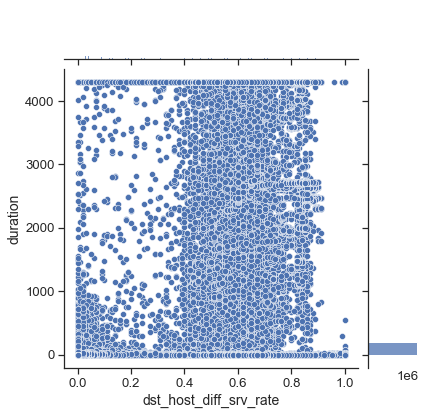


IS_GUEST_LOGIN vs HOT : 0.8052152288323196


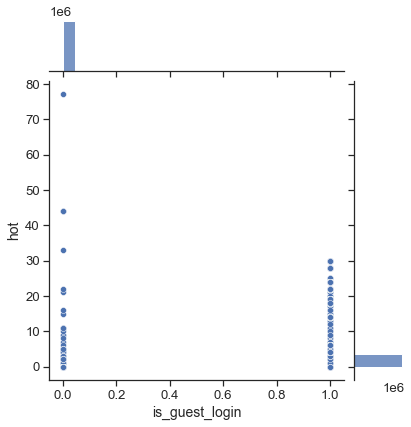


NUM_ROOT vs NUM_COMPROMISED : 0.9976014772929942


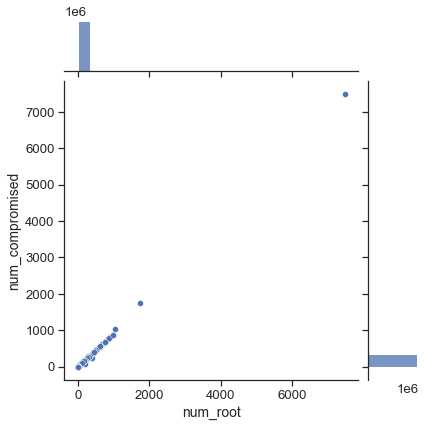

In [ ]:
# Joint Plot along with Correlation values between only highly correlated variables
l = []
for k, v in corr_cols_dict.items():
    [l.append(set([k, col])) for col in v if set([k, col]) not in l]

for x, y in l:
    print(f'\n{x.upper()} vs {y.upper()} : {df_weather[x].corr(df_weather[y])}')
    params = {'figure.figsize': (10, 8), 'axes.labelsize': 14}
    plt.rcParams.update(params)
    sns.jointplot(x, y, data=df_weather)
    plt.show()

# 5. Data Wrangling



## 5.1 Univariate Filters

#### Numerical and Categorical Data
* Identify top 5 significant features by evaluating each feature independently with respect to the target variable by exploring
1. Mutual Information (Information Gain)
2. Gini index
3. Gain Ratio
4. Chi-Squared test
5. Fisher Score
(From the above 5 you are required to use only any <b>two</b>)

#### For Text data

1. Stemming / Lemmatization.
2. Forming n-grams and storing them in the document vector.
3. TF-IDF
(From the above 2 you are required to use only any <b>two</b>)


Score: 3 Marks

### 5.1.1 Mutual Information (Information Gain)

In [ ]:

# Selecting the columns except the target variables :
cols_ = [x for x in df_weather.columns if re.compile(r'attack_flag|attack_class').match(x) is None]

X = df_weather.loc[:, cols_]
Y = df_weather.loc[:, 'attack_class']

# Getting Information Gain
importances = mutual_info_classif(X,Y.values.ravel())
feat_importances = pd.Series(importances,index=cols_)

# Identifying top 5 significant features
feat_importances_5 = feat_importances[feat_importances > 0].sort_values(ascending=False)[:5]

# Plotting the data
params = {'figure.figsize': (8, 6), 'axes.labelsize': 14}
plt.rcParams.update(params)
plots = feat_importances_5.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Diiferent Features in the order of Importance',
          fontdict={
              'fontsize': 18,
              'fontweight': 'bold'
          })
plt.xticks(rotation=45)
for bar in plots.patches:
    plots.annotate(str(format(bar.get_height(), '.3f')),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   ha='center',
                   va='center',
                   size=15,
                   xytext=(0, 8),
                   textcoords='offset points')
sns.despine()
plt.show()

KeyboardInterrupt: 

In [ ]:
feat_importances_5

### 5.1.2 Chi-Squared test

To do the chi-squared test we need to get the all the categorical columns which are having binary values and to check whether they are associated with the `attack_class` or not.

In [ ]:


bin_cols = []
for col in df_weather.drop(columns=['attack_flag']).columns:
    if sorted(df_weather[col].unique().tolist())==[0,1]:
        bin_cols.append(col)

features_chi = []

# # Filtering data as per only attack_class satisfied ratings (1 or 2) i.e. ('Excellent' or 'Good') :
# chk = df5.attack_class.isin(['Excellent', 'Good'])

j = 1
for i in bin_cols :
    sp = '-'*(85-len(i))
    print(f'\n\n## [{j}] {i.upper()} ## {sp}')

    # Creating Observed Frequency Table :
    obs_freq = pd.crosstab(index=[df_weather.loc[:, i]], columns=[df_weather.loc[:, 'attack_class']])
    print(f'\nH0 : There is no relationship between "{i}" and "attack_class" columns.')
    print(f'Ha : "{i}" and "attack_class" columns are associated.')
    print('CI : 95%, p : 0.05')

    # Chi-Squared Test as all the columns are categorical :
    print(f'\nPerforming Chi - Squared Test between "{i}" & "attack_class" :')
    print(stats.chi2_contingency(obs_freq))

    # Checking the pvalue of the output :
    if stats.chi2_contingency(obs_freq)[1] <= 0.05 :
        print('\nOutput : At 95% CI we reject the H0.')
        print(f'Statistical Conclusion : "{i}" and "attack_class" columns are associated.')
        features_chi.append(i.capitalize())
    else :
        print('\nOutput : At 95% CI we fail to reject the H0.')
        print(f'Statistical Conclusion : There is no relationship between "{i}" and "attack_class" columns.')
    j += 1

# Result :
result = ' '.join(['Features linked to `attack_class` are :', ', '.join(features_chi)])
print(f'''

+~{'~'*100}~+
| FINAL BUSINESS CONCLUSION :{' '*(len(result)-len('FINAL BUSINESS CONCLUSION '))}|
| {result} |
+~{'~'*100}~+
''')

## 5.2 Report observations

Write your observations from the results of each method. Clearly justify your choice of the method.

Score 1 mark

# 6. Implement Machine Learning Techniques

Use any 2 ML algorithms
1. Classification -- Decision Tree classifier

2. Clustering -- kmeans

3. Association Analysis

4. Anomaly detection

5. Textual data -- Naive Bayes classifier (not taught in this course)

A clear justification have to be given for why a certain algorithm was chosen to address your problem.

Score: 4 Marks (2 marks each for each algorithm)

## Problem definitions
Since we are solving two different problems here, we need to address these two problems separately.
1. **Binomial classification:** Detecting anomalies by predicting Activity is 'normal' or 'attack'
2. **Multinomial Classification:** Detecting type of activity by predicting Activity is 'normal', 'u2r', 'dos', 'r2l' or 'probe'.

<font color='#0066FF'><h2><center>**6.1 Binomial Classification**</center></h2></font>

### 6.1.1 ML technique 1 (**Logistic Regression**) + Justification

In [ ]:

train, test = train_test_split(df_weather, test_size=0.3, random_state=20)

#### Without feature selection :

In [ ]:
# Excluding all the dummies created by `service` column as it has cardinality = 70
cols = [x for x in df_weather.columns if re.compile(r'service|attack_flag|attack_class').match(x) is None]
model_eqn_1 = 'attack_flag ~ ' + ' + '.join(cols)
model_eqn_1

In [ ]:
log_model_1 = smf.logit(formula=model_eqn_1, data=train).fit(method='bfgs')

In [ ]:
print(log_model_1.summary())

In [ ]:
y_train_pred_prob = log_model_1.predict(train)
print('train data roc_score :', metrics.roc_auc_score(
    train.attack_flag, y_train_pred_prob))
y_test_pred_prob = log_model_1.predict(test)
print('test data roc_score :', metrics.roc_auc_score(
    test.attack_flag, y_test_pred_prob))

#### Feature selection based on bivariate analysis technique to identify the significance of each independent variable in predicting the target variable.

In [ ]:
plt.figure(figsize=(25, 25))
sns.heatmap(train.corr())
plt.show()

Bivariate analysis technique is to calculate the ROC_AUC_Score for each independent variable against the dependent variable. Variables with ROC_AUC_Score greater than equal to 0.6 or SomersD value greater than equal top 0.2 is kept and remaining are dropped as insignificant variables.

#### Getting the Somers' D values for all the X variables

In [ ]:
def get_somersd_values(main_df, cols, target_var):
    '''
    This function calculates the SomerD values for the features of a df.
    '''
    # Empty dataframe to store the information
    df = pd.DataFrame()

    # Iterating on each X variable
    for var_name in cols:

        # Building the bivariate model and fit
        model = smf.logit(formula=f'{target_var} ~ ' + var_name, data=main_df).fit(method='bfgs')

        # Predicting the y
        y_predicted = model.predict(main_df)

        # Getting the roc_auc_score
        roc_score = metrics.roc_auc_score(main_df[target_var], y_predicted)

        # Getting the Somers' D value
        somers_d = 2 * roc_score - 1

        # Storing the data in temp df
        temp_df = pd.DataFrame([var_name, roc_score, somers_d]).T

        # Concating the data with the output dataframe
        df = pd.concat([df, temp_df], axis=0)

    # Adding the column names
    df.columns = ['Feature', 'ROC_AUC_SCORE', 'SomersD']

    return df

cols = [x for x in df_weather.columns if re.compile(r'service|attack_flag|attack_class').match(x) is None]
df_somersd = get_somersd_values(df_weather, cols, 'attack_flag')
df_somersd

In [ ]:
features = list(df_somersd.loc[df_somersd.SomersD >= 0.2, 'Feature'])
features

In [ ]:
# Variance Inflation Factor (to resolve multicollinearity issue)
X = train.loc[:, features]
vif_values = [variance_inflation_factor(
    X.values, i) for i in range(X.shape[1])]
vif_table = pd.DataFrame([features, vif_values]).T
vif_table.columns = ['feature', 'vif_values']
vif_table.sort_values(by='vif_values')

In [ ]:
# dropping multicollinear variables one at a time recursively
while vif_table.vif_values.max() > 5:
    drop_feature = vif_table.loc[vif_table.vif_values ==
                                 vif_table.vif_values.max(), 'feature'].values[0]
    features = [var for var in features if var != drop_feature]
    X = train.loc[:, features]
    vif_values = [variance_inflation_factor(
        X.values, i) for i in range(X.shape[1])]
    vif_table = pd.DataFrame([features, vif_values]).T
    vif_table.columns = ['feature', 'vif_values']
vif_table.sort_values(by='vif_values')

#### Final Model

In [ ]:
model_eqn = 'attack_flag ~ ' + ' + '.join(vif_table.feature)
log_model_2 = smf.logit(formula=model_eqn, data=train).fit()
print(log_model_2.summary())

#### Model Scoring

In [ ]:
y_train_pred_prob = log_model_2.predict(train)
print('train data roc_score :', metrics.roc_auc_score(
    train.attack_flag, y_train_pred_prob))
y_test_pred_prob = log_model_2.predict(test)
print('test data roc_score :', metrics.roc_auc_score(
    test.attack_flag, y_test_pred_prob))

In [ ]:
# calculating model accuracy at cutoff value 0.5
train['y_pred'] = np.where(y_train_pred_prob >= 0.5, 1, 0)
confusion_matrix = pd.crosstab(index=train.attack_flag, columns=train.y_pred)
confusion_matrix

In [ ]:
tp = confusion_matrix.loc[1, 1]
tn = confusion_matrix.loc[0, 0]
fp = confusion_matrix.loc[0, 1]
fn = confusion_matrix.loc[1, 0]
accuracy = (tp+tn)/(tp+tn+fp+fn)
tpr = tp / (tp+fn)
fpr = fp / (fp+tn)
sens_spec = tpr + 1 - fpr
print('Train data : Accuracy = ', accuracy)
print('Train data : tpr = ', tpr)
print('Train data : fpr = ', fpr)
print('Train data : (Sensitivity + Specificity) = ', sens_spec)
print('\n')
print(metrics.classification_report(train.attack_flag, train.y_pred))

#### Finding Best Cut-off

In [ ]:
cut_off = pd.DataFrame(columns=['cutoff_prob', 'tpr', 'fpr', 'sens_spec'])
for p in np.arange(0.01, 1, 0.01):
    train['y_pred'] = np.where(y_train_pred_prob >= p, 1, 0)
    cm = pd.crosstab(index=train.attack_flag, columns=train.y_pred)
    tp = cm.loc[1, 1]
    tn = cm.loc[0, 0]
    fp = cm.loc[0, 1]
    fn = cm.loc[1, 0]
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    sens_spec = tpr + 1 - fpr
    temp_df = pd.DataFrame([[p, tpr, fpr, sens_spec]], columns=[
                           'cutoff_prob', 'tpr', 'fpr', 'sens_spec'])
    cut_off = pd.concat([cut_off, temp_df], axis=0)
cut_off.sort_values(by='sens_spec', ascending=False)

In [ ]:
# Selecting cutoff probability based on maximum (sensitivity + specificty) from above table
cutoff_prob = cut_off.loc[cut_off.sens_spec ==
                          cut_off.sens_spec.max(), 'cutoff_prob'].values[0]
train['y_pred'] = np.where(y_train_pred_prob >= cutoff_prob, 1, 0)
test['y_pred'] = np.where(y_test_pred_prob >= cutoff_prob, 1, 0)

confusion_matrix = pd.crosstab(index=train.attack_flag, columns=train.y_pred)
confusion_matrix

In [ ]:
# Calculating model accuracy at best cutoff
tp = confusion_matrix.loc[1, 1]
tn = confusion_matrix.loc[0, 0]
fp = confusion_matrix.loc[0, 1]
fn = confusion_matrix.loc[1, 0]
accuracy = (tp+tn)/(tp+tn+fp+fn)
tpr = tp / (tp+fn)
fpr = fp / (fp+tn)
sens_spec = tpr + 1 - fpr
print('Train data : Accuracy = ', accuracy)
print('Train data : tpr = ', tpr)
print('Train data : fpr = ', fpr)
print('Train data : (Sensitivity + Specificity) = ', sens_spec)

In [ ]:
print('\nTRAIN DATA SCORES :')
print(metrics.classification_report(train.attack_flag, train.y_pred))
print('-----------------------------------------------------')
print('\nTEST DATA SCORES :')
print(metrics.classification_report(test.attack_flag, test.y_pred))

<font color='grey'><h3> 6.1.2 ML technique 2 + Justification</h3></font>

<font color='#0066FF'><h2><center>**6.2 Multinomial Classification**</center></h2></font>

*   Multinomial classification requires balanced data.
*   As the data is severely imbalanced based on each class of attack, therefore, it is necessary to balance the data using over-sampling technique SMOTE

In [ ]:
df_weather.attack_class.value_counts()

In [ ]:
# downsizing data for attack classes [1,0] for the convenience of building model
df1 = df_weather.loc[df_weather.attack_class == 1, :].sample(n=60000, random_state=24)
df2 = df_weather.loc[df_weather.attack_class == 0, :].sample(n=60000, random_state=24)
df_weather_1 = pd.concat([df1, df2], axis=0)
for i in [2, 3, 4]:
    df_weather_1 = pd.concat([df_weather_1, df_weather.loc[df_weather.attack_class == i, :]], axis=0)
df_weather_1

In [ ]:
# splitting the data into independent & dependent variables
X = df_weather_1.drop(columns=['attack_flag', 'attack_class'])
y = df_weather_1['attack_class']

sm = SMOTE(random_state=40)
X_resampled, y_resampled = sm.fit_resample(X, y)

In [ ]:
y_resampled.value_counts()

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=25)

### 6.2.1 ML technique 1 (**Decision Tree**) + Justification

**Justification**<br>
The Multinomical Classification is a process where we need to classify a target variable based on the given set of classes. Decision Tree qualifies as the one of the best methods to tackle this problem since it has the ability of creating branches at each node and finding out the most feasible way to classify the target variable. As one can see, trees are an easy and convenient way to visualize the results of algorithms and understand how decisions are made. The main advantage of a decision tree is that it adapts quickly to the dataset. The final model can be viewed and interpreted in an orderly manner using a "tree" diagram.

In [ ]:

param_grid = {'max_depth': [8, 10, 12, 14, 15],
              'min_samples_split': [30, 40, 50, 100, 150]}
GSCV = GridSearchCV(estimator=DecisionTreeClassifier(
), param_grid=param_grid, scoring='accuracy', cv=5, verbose=True, n_jobs=-1)
DT = GSCV.fit(train_X, train_y)

In [ ]:
dt_params_ = DT.best_params_
dt_params_

In [ ]:
dt_score = DT.best_score_
dt_score

In [ ]:
DT = DecisionTreeClassifier(max_depth=15, min_samples_split=30)
DT_model_1 = DT.fit(train_X, train_y)
train_pred_class = DT_model_1.predict(train_X)
test_pred_class = DT_model_1.predict(test_X)

#### Ploting the tree

In [ ]:
plot_tree(DT_model_1)

In [ ]:
dot_data = export_graphviz(DT_model_1, out_file=None, feature_names=train_X.columns,
 class_names=train_y.unique().astype(str),
 filled=True, rounded=True,
 special_characters=True)
graph = graphviz.Source(dot_data)
graph.save('./DT.svg')
graph

#### Model Scoring

In [ ]:
print('\nTRAIN DATA SCORES :')
print(metrics.classification_report(train_y, train_pred_class))
print('-----------------------------------------------------')
print('\nTEST DATA SCORES :')
print(metrics.classification_report(test_y, test_pred_class))

In [ ]:
feature_imp = pd.concat(
    [pd.Series(train_X.columns),
     pd.Series(DT_model_1.feature_importances_)],
    axis=1)
feature_imp.columns = ['feature', 'importance']
feature_imp.sort_values(by='importance',
                        ascending=False,
                        inplace=True,
                        ignore_index=True)

# Most Important 30 features
feature_imp.head(30)

In [ ]:
features_selected = feature_imp.loc[feature_imp.importance > 0, 'feature']
features_selected

In [ ]:
model_cmpr = dict()
model_cmpr['Decision_Tree'] = [
    metrics.accuracy_score(train_y, train_pred_class),
    metrics.accuracy_score(test_y, test_pred_class),
    dt_params_]

### 6.2.2 ML technique 2 (**Random Forest**) + Justification

**Justification**<br>
In general, among all the available classification methods, random forests provide the highest accuracy. The random forest technique can also handle big data with numerous variables running into thousands. It can automatically balance data sets when a class is more infrequent than other classes in the data. Hence, we have chosen Random Forest as our second ML technique.

In [ ]:

param_grid = {'n_estimators': [60, 80, 100], 'max_features': [
    4, 5, 6, 7], 'oob_score': [True], 'random_state': [24]}
RF_gscv = GridSearchCV(estimator=RandomForestClassifier(
), param_grid=param_grid, scoring='accuracy', cv=5, verbose=2, n_jobs=-1)
RF_model_1 = RF_gscv.fit(train_X[features_selected], train_y)

In [ ]:
RF_model_1.best_params_

In [ ]:
RF_model_1.best_score_

In [ ]:
RF = RandomForestClassifier(
    n_estimators=80, max_features=6, oob_score=True, n_jobs=-1, verbose=1)
RF_model_2 = RF.fit(train_X[features_selected], train_y)
RF_train_pred = RF_model_2.predict(train_X[features_selected])
RF_test_pred = RF_model_2.predict(test_X[features_selected])

In [ ]:
rf_params_ = RF_model_2.get_params()
rf_params_

#### Model Scoring

In [ ]:
print('\nTRAIN DATA SCORES :')
print(metrics.classification_report(train_y, RF_train_pred))
print('-----------------------------------------------------')
print('\nTEST DATA SCORES :')
print(metrics.classification_report(test_y, RF_test_pred))

In [ ]:
model_cmpr['Random_Forest'] = [
    metrics.accuracy_score(train_y, RF_train_pred),
    metrics.accuracy_score(test_y, RF_test_pred),
    rf_params_]

### 6.2.3 ML technique 3 (**KNN Classifer**) + Justification

**Justification**<br>
The KNN algorithm can compete with the most accurate models because it makes highly accurate predictions. Therefore, we can use the KNN algorithm for applications that require high accuracy but that do not require a human-readable model. The quality of the predictions depends on the distance measure, since we are facing lots of different kinds of variables here, we wanted to test the accuracy using KNN as well.

In [ ]:

scaler = StandardScaler()
scaler = scaler.fit(train_X[features_selected])
train_Xscaled = pd.DataFrame(scaler.transform(
    train_X[features_selected]), columns=features_selected, index=train_X.index)
train_Xscaled

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=5, weights='uniform')
KNN_model_1 = KNN.fit(train_Xscaled, train_y)
KNN_train_pred = KNN_model_1.predict(train_Xscaled)
test_Xscaled = pd.DataFrame(scaler.transform(
    test_X[features_selected]), columns=features_selected, index=test_X.index)
KNN_test_pred = KNN_model_1.predict(test_Xscaled)

In [ ]:
knn_params_ = KNN_model_1.get_params()
knn_params_

#### Model Scoring

In [ ]:
print('\nTRAIN DATA SCORES :')
print(metrics.classification_report(train_y, KNN_train_pred))
print('-----------------------------------------------------')
print('\nTEST DATA SCORES :')
print(metrics.classification_report(test_y, KNN_test_pred))

In [ ]:
model_cmpr['KNN_Classifier'] = [
    metrics.accuracy_score(train_y, KNN_train_pred),
    metrics.accuracy_score(test_y, KNN_test_pred),
    knn_params_]

### 6.2.4 ML technique 4 (**XGBClassifier**) + Justification

**Justification**<br>
XGBoost, which stands for Extreme Gradient Boosting, is a scalable, distributed gradient-boosted decision tree (GBDT) machine learning library. It provides parallel tree boosting and is the leading machine learning library for regression, classification, and ranking problems.

In [ ]:

xgb_clf = XGBClassifier(n_estimators=100, objective='multi:softmax',
                        num_class=11, max_depth=5, random_state=24)
xgb_model_1 = xgb_clf.fit(train_X, train_y)

#### Model Scoring

In [ ]:
xgb_train_pred = xgb_model_1.predict(train_X)
xgb_test_pred = xgb_model_1.predict(test_X)
print('\nCLASSIFICATION REPORT FOR TRAIN DATA:')
print(metrics.classification_report(train_y, xgb_train_pred))
print(''.join('-'*75))
print('\nCLASSIFICATION REPORT FOR TEST DATA:')
print(metrics.classification_report(test_y, xgb_test_pred))

In [ ]:
xgb_params_ = xgb_model_1.get_xgb_params()
xgb_params_

In [ ]:
model_cmpr['XGBoost_Classifier'] = [
    metrics.accuracy_score(train_y, xgb_train_pred),
    metrics.accuracy_score(test_y, xgb_test_pred),
    xgb_params_]

## 7. Conclusion

Compare the performance of the ML techniques used.

Derive values for preformance study metrics like accuracy, precision, recall, F1 Score, AUC-ROC etc to compare the ML algos and plot them. A proper comparision based on different metrics should be done and not just accuracy alone, only then the comparision becomes authentic. You may use Confusion matrix, classification report, Word cloud etc as per the requirement of your application/problem.

Score 1 Mark

In [ ]:

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', 1000)
model_df = pd.DataFrame(model_cmpr, index=['Train_Accuracy', 'Test_Accuracy', 'Params']).T
model_df['Difference'] = model_df['Train_Accuracy'] - model_df['Test_Accuracy']
model_df.sort_values(by='Difference', ascending=True, inplace=True)
model_df

Here, we have used 1 Logistic Regression Model to solve the first problem (Binomial Classification) and used  4 different models to solve the second problem (Multinomial Classification). So looking at the scores of both train and test accuracies, all of the above models are well fit and robust. So, any model from the above can be chosen to build Network Intrusion Detection System. Since all the other scoring parameters (viz. precision, recall, F1 Score, AUC-ROC) are very close (=1 for all in the summary report), we can choose the best model based on the difference between the train and test accuracy - whichever model gets the minimum difference, we can select that one. However, if we see the lowest difference between the train and test accuracies, then we can finalize the Random Forest model as the best of all.

So, as per the given params of this model we can create one pickle file and deploy it along with the Logistic regression model in the network to build Network Intrusion Detection System.

## 8. Solution

What is the solution that is proposed to solve the business problem discussed in Section 1. Also share your learnings while working through solving the problem in terms of challenges, observations, decisions made etc.

Score 2 Marks

--------------Type the answers below this line--------------

In [ ]:
end_time = time.time()
print(f'Total time to run the workbook : {(end_time - start_time)/60 :.3f} mins')

##NOTE
All Late Submissions will incur a penalty of -2 marks. Do ensure on time submission to avoid penalty.

Good Luck!!!